# Evaluation script

## Load packages

In [9]:
Sys.setenv("PKG_CXXFLAGS"="-std=c++14")

# List of required packages
list_of_packages <- c("here", "dplyr", "ggplot2", "reshape2", "xtable", "writexl", "tidyr")

# Function to load packages and handle errors
load_if_installed <- function(p) {
  tryCatch({
    library(p, character.only = TRUE)
  }, error = function(e) {
    message(sprintf("Package '%s' is not installed.", p))
  })
}

# Load all required packages
lapply(list_of_packages, load_if_installed)

[[1]]
 [1] "tidyr"     "writexl"   "xtable"    "reshape2"  "ggplot2"   "dplyr"    
 [7] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[2]]
 [1] "tidyr"     "writexl"   "xtable"    "reshape2"  "ggplot2"   "dplyr"    
 [7] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[3]]
 [1] "tidyr"     "writexl"   "xtable"    "reshape2"  "ggplot2"   "dplyr"    
 [7] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[4]]
 [1] "tidyr"     "writexl"   "xtable"    "reshape2"  "ggplot2"   "dplyr"    
 [7] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[5]]
 [1] "tidyr"     "writexl"   "xtable"    "reshape2"  "ggplot2"   "dplyr"    
 [7] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[6]]
 [1] "tidyr"     "writexl"   "xtable"    "reshape2"  "ggplot2"   "dplyr"    
 [7] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[7]]
 [1] "tidyr"     "writexl"   "xtable"    "reshape2"  "ggplot2"   "dplyr"    
 [7] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"

## Load results

In [10]:
datanames <- c("cps", "adult")
modelnames <- c("orig", "orig_dis", "cart", "rf", "bn", "xgb", "svm")
seeds <- 1235:1244

loaded_data <- list()

# Loop through all combinations of dataname and modelname
for (dataname in datanames) {
  for (modelname in modelnames) {
    for (seed in seeds) {
      # Construct the file path
      file_path <- paste0(here(), "/results/", dataname, "_", modelname, "_res_", seed, ".RData")
      
      # Check if the file exists
      if (file.exists(file_path)) {
        # Create a new environment to load the RData
        env <- new.env()
        
        # Load the file into the environment
        load(file = file_path, envir = env)
        
        # Assume the result object inside the RData file is always named "cps_res" or "adult_res"
        result_name <- ls(env)[1]  # Get the name of the loaded object (either cps_res or adult_res)
        
        # Retrieve the result
        result <- env[[result_name]]
        
        # Wrap non-nested dataframes in a list
        if (!is.list(result) || !is.list(result[[1]])) {
          result <- list(result)  # Wrap in a list if it is not already nested
        }
        
        # Rename "orig" to "og" when saving
        save_modelname <- ifelse(modelname == "orig", "og", modelname)
        loaded_data[[paste0(dataname, "_", save_modelname, "_", seed)]] <- result
        
        cat("Loaded data for:", dataname, save_modelname, seed, "\n")
      } else {
        # Print message if the file does not exist
        cat("Data does not exist for:", dataname, modelname, seed, "\n")
      }
    }
  }
}


# Print all loaded dataframes
cat("\n--- List of loaded dataframes ---\n")
for (name in names(loaded_data)) {
  cat("Data for:", name, "\n")
  print(loaded_data[[name]])
}


Loaded data for: cps og 1235 
Loaded data for: cps og 1236 
Loaded data for: cps og 1237 
Loaded data for: cps og 1238 
Loaded data for: cps og 1239 
Loaded data for: cps og 1240 
Loaded data for: cps og 1241 
Loaded data for: cps og 1242 
Loaded data for: cps og 1243 
Loaded data for: cps og 1244 
Loaded data for: cps orig_dis 1235 
Loaded data for: cps orig_dis 1236 
Loaded data for: cps orig_dis 1237 
Loaded data for: cps orig_dis 1238 
Loaded data for: cps orig_dis 1239 
Loaded data for: cps orig_dis 1240 
Loaded data for: cps orig_dis 1241 
Loaded data for: cps orig_dis 1242 
Loaded data for: cps orig_dis 1243 
Loaded data for: cps orig_dis 1244 
Loaded data for: cps cart 1235 
Loaded data for: cps cart 1236 
Loaded data for: cps cart 1237 
Loaded data for: cps cart 1238 
Loaded data for: cps cart 1239 
Loaded data for: cps cart 1240 
Loaded data for: cps cart 1241 
Loaded data for: cps cart 1242 
Loaded data for: cps cart 1243 
Loaded data for: cps cart 1244 
Loaded data for: cps

In [11]:
print(loaded_data[["cps_svm_1235"]])

[[1]]
          MAE        MSE     RMSE  R_squared     MAPE
CART 34767.49 2708343197 52035.80 0.17515434 15628.62
RF   35087.11 2729283133 52221.80 0.16901999      NaN
XGB  34781.61 2707273899 52010.46 0.17574991      NaN
SVM  36923.28 3248367485 56991.82 0.01072309      NaN



## Average results over seeds

In [12]:
average_dataframes <- function(df_list) {
  # Check that the list is not empty and contains dataframes
  if (length(df_list) == 0) {
    stop("The dataframe list is empty.")
  }
  
  # Use Reduce to accumulate sums, then divide by the number of dataframes to get the mean
  result <- Reduce("+", df_list) / length(df_list)
  return(result)
}


In [13]:
# Initialize list to store averaged results
modelnames <- c("og", "orig_dis", "cart", "rf", "bn", "xgb", "svm")
averaged_data <- list()

# Loop through the datanames and modelnames to average dataframes
for (dataname in datanames) {
  for (modelname in modelnames) {
    # Filter the list of loaded data for the current dataname and modelname
    data_key <- paste0(dataname, "_", modelname, "_")
    model_data <- loaded_data[grep(data_key, names(loaded_data))]
    
    if (length(model_data) > 0) {  # Check if there is data for this combination
      if (dataname == "cps") {
        # For cps data, extract the nested lists
        first_df_list <- lapply(model_data, function(x) if (is.list(x)) x[[1]] else x)  # Handle both nested and direct dataframes
        
        # Average the first dataframe over the seeds
        cat("Averaging first dataframe for:", dataname, modelname, "\n")
        averaged_data[[paste0(dataname, "_", modelname)]] <- as.data.frame(average_dataframes(first_df_list))
        
        # Check if the second dataframe exists in each list element and handle nested/non-nested cases
        second_df_list <- lapply(model_data, function(x) if (is.list(x) && length(x) >= 2) x[[2]] else NULL)
        second_df_list <- Filter(Negate(is.null), second_df_list)  # Remove NULL elements
        
        if (length(second_df_list) > 0) {
          cat("Averaging second dataframe for:", dataname, modelname, "\n")
          averaged_data[[paste0(dataname, "_", modelname, "_bn_pred")]] <- as.data.frame(average_dataframes(second_df_list))
        } else {
          cat("No second dataframe for:", dataname, modelname, "\n")
        }
        
      } else if (dataname == "adult") {
        # For adult data, extract the single dataframe from the nested structure or directly if non-nested
        df_list <- lapply(model_data, function(x) if (is.list(x)) x[[1]] else x)
        
        # Average the dataframe over the seeds
        cat("Averaging dataframe for:", dataname, modelname, "\n")
        averaged_data[[paste0(dataname, "_", modelname)]] <- as.data.frame(average_dataframes(df_list))
      }
      
      cat("Averaged data for:", dataname, modelname, "\n")
    } else {
      # Add NULL for combinations without data, if needed
      cat("No data to average for:", dataname, modelname, "\n")
      averaged_data[[paste0(dataname, "_", modelname)]] <- NULL
    }
  }
}

# Print the names of averaged data to verify which keys were created
cat("Available keys in averaged_data:\n")
print(names(averaged_data))

# Print a summary of all averaged data at the end
cat("\n--- Final Averaged Data Summary ---\n")
for (name in names(averaged_data)) {
  cat("Averaged Data for:", name, "\n")
  print(averaged_data[[name]])
}


Averaging first dataframe for: cps og 
Averaging second dataframe for: cps og 
Averaged data for: cps og 
Averaging first dataframe for: cps orig_dis 
Averaging second dataframe for: cps orig_dis 
Averaged data for: cps orig_dis 
Averaging first dataframe for: cps cart 
Averaging second dataframe for: cps cart 
Averaged data for: cps cart 
Averaging first dataframe for: cps rf 
Averaging second dataframe for: cps rf 
Averaged data for: cps rf 
Averaging first dataframe for: cps bn 
Averaging second dataframe for: cps bn 
Averaged data for: cps bn 
Averaging first dataframe for: cps xgb 
Averaging second dataframe for: cps xgb 
Averaged data for: cps xgb 
Averaging first dataframe for: cps svm 
No second dataframe for: cps svm 
Averaged data for: cps svm 
Averaging dataframe for: adult og 
Averaged data for: adult og 
Averaging dataframe for: adult orig_dis 
Averaged data for: adult orig_dis 
Averaging dataframe for: adult cart 
Averaged data for: adult cart 
Averaging dataframe for: ad

In [14]:
averaged_data[["adult_svm"]]

,Accuracy,F1,Sensitivity,Specificity
,<dbl>,<dbl>,<dbl>,<dbl>
CART,0.6287746,0.7720786,0.9999631,1.784917e-05
RF,0.6287415,0.7720435,0.9998526,1.160557e-04
XGB,0.5786586,0.7066187,0.8070111,1.918086e-01
SVM,0.6287912,0.7720930,1.0000000,0.000000e+00
BN,0.6288062,NaN,0.9000000,1.000000e-01


## Metric Tables

In [15]:
# Define the datasets and models
datanames <- c("cps", "adult")
modelnames <- c("og", "cart", "rf", "xgb", "svm")  # Excluding "orig_dis"
metrics_regression <- c("MAE", "MSE", "RMSE", "R_squared", "MAPE") # For cps
metrics_classification <- c("Accuracy", "F1", "Sensitivity", "Specificity") # For adult

# Initialize empty data frames for cps and adult datasets
cps_table <- data.frame(matrix(ncol = length(modelnames) + 2, nrow = 0))  # +2 for model and metric columns
colnames(cps_table) <- c("Prediction Model", "Metric", "Original Data", "CART-syn. Data", "RF-syn. Data", "XGB-syn. Data", "SVM-syn. Data")

adult_table <- data.frame(matrix(ncol = length(modelnames) + 2, nrow = 0))  # +2 for model and metric columns
colnames(adult_table) <- c("Prediction Model", "Metric", "Original Data", "CART-syn. Data", "RF-syn. Data", "XGB-syn. Data", "SVM-syn. Data")

# Fill in the cps table with regression metrics
for (model in c("CART", "RF", "XGB", "SVM")) {
  for (metric in metrics_regression) {
    row <- c(model, metric)
    for (modelname in modelnames) {
      df_name <- paste0("cps_", modelname)
      if (!is.null(averaged_data[[df_name]])) {
        regression_metrics <- averaged_data[[df_name]]
        if (!is.null(regression_metrics) && !is.null(regression_metrics[model, metric])) {
          row <- c(row, regression_metrics[model, metric])
        } else {
          row <- c(row, NA)
        }
      } else {
        row <- c(row, NA)
      }
    }
    cps_table <- rbind(cps_table, row)
  }
}

# Fill in the adult table with classification metrics
for (model in c("CART", "RF", "XGB", "SVM", "BN")) {
  for (metric in metrics_classification) {
    row <- c(model, metric)
    for (modelname in modelnames) {
      df_name <- paste0("adult_", modelname)
      if (!is.null(averaged_data[[df_name]])) {
        classification_metrics <- averaged_data[[df_name]]
        if (!is.null(classification_metrics) && !is.null(classification_metrics[model, metric])) {
          row <- c(row, classification_metrics[model, metric])
        } else {
          row <- c(row, NA)
        }
      } else {
        row <- c(row, NA)
      }
    }
    adult_table <- rbind(adult_table, row)
  }
}

# Print the tables with correct column names
cat("\n--- CPS Dataset Table (Regression) ---\n")
colnames(cps_table) <- c("Prediction Model", "Metric", "Original data", "CART-syn. data", "RF-syn. data", "XGB-syn. data", "SVM/R-syn. data")
print(cps_table)

cat("\n--- Adult Dataset Table (Classification) ---\n")
colnames(adult_table) <- c("Prediction Model", "Metric", "Original data", "CART-syn. data", "RF-syn. data", "XGB-syn. data", "SVM/R-syn. data")
print(adult_table)



--- CPS Dataset Table (Regression) ---
   Prediction Model    Metric     Original data    CART-syn. data
1              CART       MAE  26343.3260164423  26178.4902694942
2              CART       MSE  1714859596.86429  1705863260.39886
3              CART      RMSE  41407.1577894658  41289.5052688397
4              CART R_squared  0.29163923072279 0.295275745991159
5              CART      MAPE  4530.66826991606  4747.17078716042
6                RF       MAE  25034.9584160487  24540.4966459923
7                RF       MSE  1595924953.69996  1549769835.40984
8                RF      RMSE   39942.327242501  39356.3951168788
9                RF R_squared 0.340880001796521 0.359754486972922
10               RF      MAPE  4340.00487060294  4407.40395529833
11              XGB       MAE  24831.1398064914  24510.8488643531
12              XGB       MSE  1583878594.25728  1549601719.90557
13              XGB      RMSE   39790.273069657  39355.7747158373
14              XGB R_squared  0.345

In [16]:
cps_table

Prediction Model,Metric,Original data,CART-syn. data,RF-syn. data,XGB-syn. data,SVM/R-syn. data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CART,MAE,26343.3260164423,26178.4902694942,29679.6329494522,33607.1805763609,34741.1676713254
CART,MSE,1714859596.86429,1705863260.39886,2049007653.38704,2404325889.0473,2709944633.76313
CART,RMSE,41407.1577894658,41289.5052688397,45256.9219813804,49024.0530333112,52049.4184585686
CART,R_squared,0.29163923072279,0.295275745991159,0.136492535572256,0.00787676321385017,0.175760729951694
CART,MAPE,4530.66826991606,4747.17078716042,3835.94918173852,NaN,NaN
RF,MAE,25034.9584160487,24540.4966459923,29138.6183892165,33686.0111884192,35060.5714357211
RF,MSE,1595924953.69996,1549769835.40984,1996587550.41812,2410918011.79466,2730284434.0318
RF,RMSE,39942.327242501,39356.3951168788,44670.6986245275,49093.2028765215,52240.5274797851
RF,R_squared,0.340880001796521,0.359754486972922,0.158654974419597,0.00515816463493392,0.169626808912669


In [17]:
# Reorder cps_table by metric
cps_table_metric_ordered <- cps_table %>%
  arrange(Metric) %>%
  filter(Metric != "MAPE")

cps_table_metric_ordered

Prediction Model,Metric,Original data,CART-syn. data,RF-syn. data,XGB-syn. data,SVM/R-syn. data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CART,MAE,26343.3260164423,26178.4902694942,29679.6329494522,33607.1805763609,34741.1676713254
RF,MAE,25034.9584160487,24540.4966459923,29138.6183892165,33686.0111884192,35060.5714357211
XGB,MAE,24831.1398064914,24510.8488643531,28986.3671764169,33615.5693366872,34756.9783236284
SVM,MAE,24080.6320531298,23928.5528632922,27906.2933645,31962.0718938016,36900.7647382699
CART,MSE,1714859596.86429,1705863260.39886,2049007653.38704,2404325889.0473,2709944633.76313
RF,MSE,1595924953.69996,1549769835.40984,1996587550.41812,2410918011.79466,2730284434.0318
XGB,MSE,1583878594.25728,1549601719.90557,1988414595.86452,2400645691.99728,2709118990.40014
SVM,MSE,1689493173.73163,1676849659.69535,2106843603.43927,2586428611.78139,3250277079.95226
CART,RMSE,41407.1577894658,41289.5052688397,45256.9219813804,49024.0530333112,52049.4184585686


In [18]:
write_xlsx(cps_table_metric_ordered, "results/cps_res_presentation.xlsx")

In [19]:
adult_table

Prediction Model,Metric,Original data,CART-syn. data,RF-syn. data,XGB-syn. data,SVM/R-syn. data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CART,Accuracy,0.853441417648823,0.854671443133496,0.85073199121601,0.750251973462735,0.628774616629339
CART,F1,0.906217222833311,0.906552193413809,0.903469855874936,0.85729893009612,0.772078604209738
CART,Sensitivity,0.942751830290523,0.939825628333379,0.935781716575136,0.999951234824903,0.999963070429966
CART,Specificity,0.583964387700698,0.598996801105329,0.600075574171273,0.000119052368837452,1.78491744756805e-05
RF,Accuracy,0.860848156137676,0.868506797105652,0.860070494276981,0.750281812381658,0.628741460132487
RF,F1,0.910147822028902,0.914887020060937,0.909023720380285,0.857302218550889,0.772043474292561
RF,Sensitivity,0.938337581234595,0.942188104679518,0.936527121949292,0.999858485572361,0.999852551859602
RF,Specificity,0.627038166300141,0.647319062933176,0.634833045600497,0.000517637879966009,0.00011605572023743
XGB,Accuracy,0.868970829250288,0.870612106703776,0.854997748414834,0.724404861101322,0.57865857550302


In [20]:
# Reorder adult_table by metric
adult_table_metric_ordered <- adult_table %>%
  arrange(Metric) %>%
  filter(`Prediction Model` != "BN") # Filter out BN

adult_table_metric_ordered

Prediction Model,Metric,Original data,CART-syn. data,RF-syn. data,XGB-syn. data,SVM/R-syn. data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CART,Accuracy,0.853441417648823,0.854671443133496,0.85073199121601,0.750251973462735,0.628774616629339
RF,Accuracy,0.860848156137676,0.868506797105652,0.860070494276981,0.750281812381658,0.628741460132487
XGB,Accuracy,0.868970829250288,0.870612106703776,0.854997748414834,0.724404861101322,0.57865857550302
SVM,Accuracy,0.810718709427368,0.808034261305554,0.775162428189315,0.750218815038825,0.62879119488068
CART,F1,0.906217222833311,0.906552193413809,0.903469855874936,0.85729893009612,0.772078604209738
RF,F1,0.910147822028902,0.914887020060937,0.909023720380285,0.857302218550889,0.772043474292561
XGB,F1,0.915057167781471,0.915838520393458,0.905451398998628,0.837606397354582,0.706618735429609
SVM,F1,0.882538741950765,0.882310465616764,0.867117596347998,0.857277249929833,0.772092978048541
CART,Sensitivity,0.942751830290523,0.939825628333379,0.935781716575136,0.999951234824903,0.999963070429966


In [21]:
write_xlsx(adult_table_metric_ordered, "results/adult_res_presentation.xlsx")

### Extra BN Tables

#### BN Prediction Model Metrics on Different Synthetic Models' Data

In [22]:
# Create a function to extract the relevant columns from the averaged dataframes
generate_table <- function(averaged_data) {
  # Initialize an empty data frame to store results
  result_df <- data.frame(
    "prediction model" = character(),
    "metric" = character(),
    "Original data" = numeric(),
    "CART-syn. data" = numeric(),
    "RF-syn. data" = numeric(),
    "XGB-syn. data" = numeric(),
    "SVM-syn. data" = numeric(),
    "BN-syn. data" = numeric(),  # New column for BN-syn. data
    stringsAsFactors = FALSE
  )
  
  # Define the metrics to be extracted
  metrics <- c("Accuracy", "F1", "Sensitivity", "Specificity")
  
  # Extract data for each metric
  for (metric in metrics) {
    # Check if the metric exists in each dataframe
    og_values <- if (metric %in% colnames(averaged_data[["cps_og_bn_pred"]])) averaged_data[["cps_og_bn_pred"]][, metric] else NA
    cart_values <- if (metric %in% colnames(averaged_data[["cps_cart_bn_pred"]])) averaged_data[["cps_cart_bn_pred"]][, metric] else NA
    rf_values <- if (metric %in% colnames(averaged_data[["cps_rf_bn_pred"]])) averaged_data[["cps_rf_bn_pred"]][, metric] else NA
    xgb_values <- if (metric %in% colnames(averaged_data[["cps_xgb_bn_pred"]])) averaged_data[["cps_xgb_bn_pred"]][, metric] else NA
    svm_values <- if (metric %in% colnames(averaged_data[["cps_svm_bn_pred"]])) averaged_data[["cps_svm_bn_pred"]][, metric] else NA
    bn_syn_values <- if (metric %in% colnames(averaged_data[["cps_bn_bn_pred"]])) averaged_data[["cps_bn_bn_pred"]][, metric] else NA
    
    # Ensure all values have the same length (they should all be length 1 in this case)
    if (length(og_values) == 1 && length(cart_values) == 1 && length(rf_values) == 1 && 
        length(xgb_values) == 1 && length(svm_values) == 1 && length(bn_syn_values) == 1) {
      # Create a new row for the result table
      new_row <- data.frame(
        "prediction model" = "BN",
        "metric" = metric,
        "Original data" = og_values,
        "CART-syn. data" = cart_values,
        "RF-syn. data" = rf_values,
        "XGB-syn. data" = xgb_values,
        "SVM-syn. data" = svm_values,
        "BN-syn. data" = bn_syn_values,  # Include BN-syn. data
        stringsAsFactors = FALSE
      )
      
      # Append the new row to the result dataframe
      result_df <- rbind(result_df, new_row)
    } else {
      cat("Metric", metric, "is not available for all models\n")
    }
  }
  
  return(result_df)
}

# Generate the table using the function
result_table <- generate_table(averaged_data)

# Print the result table
result_table


prediction.model,metric,Original.data,CART.syn..data,RF.syn..data,XGB.syn..data,SVM.syn..data,BN.syn..data
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
BN,Accuracy,0.9603890,0.9454136,0.9518807,0.9476514,NA,0.9600016
BN,F1,0.9797943,0.9718764,0.9752820,0.9730208,NA,0.9795925
BN,Sensitivity,0.2200000,0.2080000,0.2070000,0.1806667,NA,0.2190000
BN,Specificity,0.8000000,0.8000000,0.8000000,0.8333333,NA,0.8000000


In [23]:
write_xlsx(result_table, "results/cps_bn_res_presentation.xlsx")

In [24]:
# Create a function to generate a table for the adult data, including the BN prediction model
generate_adult_table <- function(averaged_data) {
  # Initialize an empty data frame to store results
  result_df <- data.frame(
    "prediction model" = character(),
    "metric" = character(),
    "Original data" = numeric(),
    "CART-syn. data" = numeric(),
    "RF-syn. data" = numeric(),
    "XGB-syn. data" = numeric(),
    "SVM-syn. data" = numeric(),
    "BN-syn. data" = numeric(),  # New column for BN-syn. data
    stringsAsFactors = FALSE
  )
  
  # Define the metrics to be extracted
  metrics <- c("Accuracy", "F1", "Sensitivity", "Specificity")
  
  # Loop through each metric
  for (metric in metrics) {
    # Extract values from each model's dataframe, using NA if data is missing
    og_values <- if (metric %in% colnames(averaged_data[["adult_og"]])) averaged_data[["adult_og"]]["BN", metric] else NA
    cart_values <- if (metric %in% colnames(averaged_data[["adult_cart"]])) averaged_data[["adult_cart"]]["BN", metric] else NA
    rf_values <- if (metric %in% colnames(averaged_data[["adult_rf"]])) averaged_data[["adult_rf"]]["BN", metric] else NA
    xgb_values <- if (metric %in% colnames(averaged_data[["adult_xgb"]])) averaged_data[["adult_xgb"]]["BN", metric] else NA
    svm_values <- if (metric %in% colnames(averaged_data[["adult_svm"]])) averaged_data[["adult_svm"]]["BN", metric] else NA
    bn_syn_values <- if (metric %in% colnames(averaged_data[["adult_bn"]])) averaged_data[["adult_bn"]]["BN", metric] else NA
    
    # Create a new row for the result table
    new_row <- data.frame(
      "prediction model" = "BN",  # BN for synthesized data
      "metric" = metric,
      "Original data" = og_values,
      "CART-syn. data" = cart_values,
      "RF-syn. data" = rf_values,
      "XGB-syn. data" = xgb_values,
      "SVM-syn. data" = svm_values,
      "BN-syn. data" = bn_syn_values,
      stringsAsFactors = FALSE
    )
    
    # Append the new row to the result dataframe
    result_df <- rbind(result_df, new_row)
  }
  
  return(result_df)
}

# Generate the table using the function for adult data
adult_result_table <- generate_adult_table(averaged_data)

# Print the result table
print(adult_result_table)


  prediction.model      metric Original.data CART.syn..data RF.syn..data
1               BN    Accuracy     0.8264646      0.8270822    0.8301440
2               BN          F1     0.8868903      0.8358287    0.8307471
3               BN Sensitivity     0.9060926      0.8444277    0.8369992
4               BN Specificity     0.5864668      0.6474837    0.6600012
  XGB.syn..data SVM.syn..data BN.syn..data
1     0.7502537     0.6288062    0.8429782
2     0.8573050           NaN    0.8477829
3     1.0000000     0.9000000    0.8561314
4     0.0000000     0.1000000    0.6564429


In [25]:
write_xlsx(result_table, "results/adult_bn_res_presentation.xlsx")

In [26]:
result_table

prediction.model,metric,Original.data,CART.syn..data,RF.syn..data,XGB.syn..data,SVM.syn..data,BN.syn..data
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
BN,Accuracy,0.9603890,0.9454136,0.9518807,0.9476514,NA,0.9600016
BN,F1,0.9797943,0.9718764,0.9752820,0.9730208,NA,0.9795925
BN,Sensitivity,0.2200000,0.2080000,0.2070000,0.1806667,NA,0.2190000
BN,Specificity,0.8000000,0.8000000,0.8000000,0.8333333,NA,0.8000000


In [27]:
# Create a function to generate a table for the discretized data, including the BN prediction model
generate_discretized_table <- function(averaged_data) {
  # Initialize an empty data frame to store results
  result_df <- data.frame(
    "prediction model" = character(),
    "metric" = character(),
    "disc. CPS" = numeric(),   # Renamed column for CPS data
    "disc. adult" = numeric(), # New column for adult data
    stringsAsFactors = FALSE
  )
  
  # Define the metrics to be extracted
  metrics <- c("Accuracy", "F1", "Sensitivity", "Specificity")
  
  # Define the prediction models in cps_orig_dis and adult_orig_dis
  prediction_models <- rownames(averaged_data[["cps_orig_dis"]])
  
  # Loop through each metric
  for (metric in metrics) {
    for (model in prediction_models) {
      # Extract the values for CPS discretized data
      cps_values <- if (metric %in% colnames(averaged_data[["cps_orig_dis"]])) averaged_data[["cps_orig_dis"]][model, metric] else NA
      
      # Extract the values for adult discretized data, including BN as a row in adult_orig_dis
      adult_values <- if (model %in% rownames(averaged_data[["adult_orig_dis"]]) && metric %in% colnames(averaged_data[["adult_orig_dis"]])) 
                      averaged_data[["adult_orig_dis"]][model, metric] else NA
      
      # Create a new row for the result table
      new_row <- data.frame(
        "prediction model" = model,
        "metric" = metric,
        "disc. CPS" = cps_values,   # Values for CPS data
        "disc. adult" = adult_values,  # Values for adult data
        stringsAsFactors = FALSE
      )
      
      # Append the new row to the result dataframe
      result_df <- rbind(result_df, new_row)
    }
    
    # Add the BN prediction model from cps_orig_dis_bn_pred for CPS data
    bn_cps_values <- if (metric %in% colnames(averaged_data[["cps_orig_dis_bn_pred"]])) averaged_data[["cps_orig_dis_bn_pred"]][, metric] else NA
    
    # BN for adult data is included in adult_orig_dis as a row
    bn_adult_values <- if ("BN" %in% rownames(averaged_data[["adult_orig_dis"]]) && metric %in% colnames(averaged_data[["adult_orig_dis"]])) 
                        averaged_data[["adult_orig_dis"]]["BN", metric] else NA
    
    # Create a new row for BN and add it to the result dataframe
    bn_row <- data.frame(
      "prediction model" = "BN",
      "metric" = metric,
      "disc. CPS" = bn_cps_values,   # BN for CPS data
      "disc. adult" = bn_adult_values,  # BN for adult data
      stringsAsFactors = FALSE
    )
    
    result_df <- rbind(result_df, bn_row)
  }
  
  return(result_df)
}

# Generate the table for discretized data including BN and disc. adult data
discretized_result_table <- generate_discretized_table(averaged_data)

# Print the result table
print(discretized_result_table)


   prediction.model      metric disc..CPS disc..adult
1              CART    Accuracy 0.9603791   0.8316757
2                RF    Accuracy 0.9603932   0.8371926
3               XGB    Accuracy 0.9604114   0.8431968
4               SVM    Accuracy 0.9603932   0.8152872
5                BN    Accuracy 0.9603940   0.8262161
6              CART          F1 0.9797912   0.8916508
7                RF          F1 0.9797965   0.8951397
8               XGB          F1 0.9019285   0.8981551
9               SVM          F1 0.9797965   0.8833293
10               BN          F1 0.9797969   0.8866629
11             CART Sensitivity 0.2199971   0.9221991
12               RF Sensitivity 0.2200000   0.9252052
13              XGB Sensitivity 0.2201137   0.9205837
14              SVM Sensitivity 0.2200000   0.9305817
15               BN Sensitivity 0.2200000   0.9053639
16             CART Specificity 0.8000166   0.5585375
17               RF Specificity 0.8000000   0.5716326
18              XGB Specific

#### CPS

In [28]:
generate_discretized_table <- function(averaged_data) {
  # Initialize an empty data frame to store results
  result_df <- data.frame(
    "prediction model" = character(),
    "metric" = character(),
    "disc. CPS" = numeric(),   # Renamed column for CPS data
    "BN-Synthesized Data" = numeric(), # New column for BN-synthesized data
    stringsAsFactors = FALSE
  )
  
  # Define the metrics to be extracted
  metrics <- c("Accuracy", "F1", "Sensitivity", "Specificity")

  rownames(averaged_data[["cps_orig_dis_bn_pred"]]) <- "BN"
  rownames(averaged_data[["cps_bn_bn_pred"]]) <- "BN"
  
  # Define the prediction models in cps_orig_dis and cps_bn
  prediction_models <- rownames(averaged_data[["cps_orig_dis"]])
  
  # Loop through each metric
  for (metric in metrics) {
    for (model in prediction_models) {
      # Extract the values for CPS discretized data
      cps_values <- if (metric %in% colnames(averaged_data[["cps_orig_dis"]])) averaged_data[["cps_orig_dis"]][model, metric] else NA
      
      # Extract the values for BN-synthesized data
      bn_values <- if (model %in% rownames(averaged_data[["cps_bn"]]) && metric %in% colnames(averaged_data[["cps_bn"]])) 
                      averaged_data[["cps_bn"]][model, metric] else NA
      
      # Create a new row for the result table
      new_row <- data.frame(
        "prediction model" = model,
        "metric" = metric,
        "disc. CPS" = cps_values,   # Values for CPS data
        "BN-Synthesized Data" = bn_values,  # Values for BN-synthesized data
        stringsAsFactors = FALSE
      )
      
      # Append the new row to the result dataframe
      result_df <- rbind(result_df, new_row)
    }
    
    # Add the BN prediction model from cps_orig_dis_bn_pred for CPS data
    bn_cps_values <- if (metric %in% colnames(averaged_data[["cps_orig_dis_bn_pred"]])) averaged_data[["cps_orig_dis_bn_pred"]][, metric] else NA
    
    # Add BN-synthesized data from cps_bn_bn_pred for BN model
    bn_bn_values <- if ("BN" %in% rownames(averaged_data[["cps_bn_bn_pred"]]) && metric %in% colnames(averaged_data[["cps_bn_bn_pred"]])) 
                        averaged_data[["cps_bn_bn_pred"]]["BN", metric] else NA
    
    # Create a new row for BN and add it to the result dataframe
    bn_row <- data.frame(
      "prediction model" = "BN",
      "metric" = metric,
      "disc. CPS" = bn_cps_values,   # BN for CPS data
      "BN-Synthesized Data" = bn_bn_values,  # BN for BN-synthesized data
      stringsAsFactors = FALSE
    )
    
    result_df <- rbind(result_df, bn_row)
  }
  
  return(result_df)
}

# Generate the table for discretized data including BN and CPS data
discretized_result_table <- generate_discretized_table(averaged_data)

# Print the result table
print(discretized_result_table)


   prediction.model      metric disc..CPS BN.Synthesized.Data
1              CART    Accuracy 0.9603791           0.9600028
2                RF    Accuracy 0.9603932           0.9599867
3               XGB    Accuracy 0.9604114           0.9600028
4               SVM    Accuracy 0.9603932           0.9600069
5                BN    Accuracy 0.9603940           0.9600016
6              CART          F1 0.9797912           0.9795932
7                RF          F1 0.9797965           0.9698506
8               XGB          F1 0.9019285           0.9698552
9               SVM          F1 0.9797965           0.9795953
10               BN          F1 0.9797969           0.9795925
11             CART Sensitivity 0.2199971           0.2189992
12               RF Sensitivity 0.2200000           0.2190066
13              XGB Sensitivity 0.2201137           0.2190125
14              SVM Sensitivity 0.2200000           0.2190000
15               BN Sensitivity 0.2200000           0.2190000
16      

In [29]:
write_xlsx(discretized_result_table, "results/cps_bn_res_presentation.xlsx")

#### Adult

In [30]:
generate_discretized_table_v2 <- function(averaged_data) {
  # Initialize an empty data frame to store results
  result_df_v2 <- data.frame(
    "prediction model" = character(),
    "metric" = character(),
    "disc. adult" = numeric(), # Discretized adult data
    "BN-Synthesized adult" = numeric(), # BN-synthesized adult data
    stringsAsFactors = FALSE
  )
  
  # Define the metrics to be extracted
  metrics <- c("Accuracy", "F1", "Sensitivity", "Specificity")
  
  # Define the prediction models in adult_orig_dis
  prediction_models <- rownames(averaged_data[["adult_orig_dis"]])
  
  # Loop through each metric
  for (metric in metrics) {
    for (model in prediction_models) {
      # Extract the values for adult discretized data
      adult_values <- if (model %in% rownames(averaged_data[["adult_orig_dis"]]) && metric %in% colnames(averaged_data[["adult_orig_dis"]])) 
                         averaged_data[["adult_orig_dis"]][model, metric] else NA
      
      # Extract the values for BN-synthesized adult data
      bn_adult_values <- if (model %in% rownames(averaged_data[["adult_bn"]]) && metric %in% colnames(averaged_data[["adult_bn"]])) 
                           averaged_data[["adult_bn"]][model, metric] else NA
      
      # Create a new row for the result table
      new_row <- data.frame(
        "prediction model" = model,
        "metric" = metric,
        "disc. adult" = adult_values,   # Values for discretized adult data
        "BN-Synthesized adult" = bn_adult_values,  # Values for BN-synthesized adult data
        stringsAsFactors = FALSE
      )
      
      # Append the new row to the result dataframe
      result_df_v2 <- rbind(result_df_v2, new_row)
    }
    
    # Handle BN prediction model for adult data directly from adult_bn
    bn_adult_values <- if ("BN" %in% rownames(averaged_data[["adult_bn"]]) && metric %in% colnames(averaged_data[["adult_bn"]])) 
                         averaged_data[["adult_bn"]]["BN", metric] else NA
    
    # Create a new row for BN and add it to the result dataframe
    bn_row <- data.frame(
      "prediction model" = "BN",
      "metric" = metric,
      "disc. adult" = bn_adult_values,  # BN for discretized adult data
      "BN-Synthesized adult" = bn_adult_values,  # BN for BN-synthesized adult data
      stringsAsFactors = FALSE
    )
    
    result_df_v2 <- rbind(result_df_v2, bn_row)
  }
  
  return(result_df_v2)
}

# Generate the table for discretized and BN-synthesized adult data
discretized_result_table_v2 <- generate_discretized_table_v2(averaged_data)

# Print the result table
print(discretized_result_table_v2)


   prediction.model      metric disc..adult BN.Synthesized.adult
1              CART    Accuracy   0.8316757            0.8344010
2                RF    Accuracy   0.8371926            0.8365427
3               XGB    Accuracy   0.8431968            0.8420561
4               SVM    Accuracy   0.8152872            0.8185101
5                BN    Accuracy   0.8262161            0.8429782
6                BN    Accuracy   0.8429782            0.8429782
7              CART          F1   0.8916508            0.8945574
8                RF          F1   0.8951397            0.8959183
9               XGB          F1   0.8981551            0.8988359
10              SVM          F1   0.8833293            0.8868692
11               BN          F1   0.8866629            0.8477829
12               BN          F1   0.8477829            0.8477829
13             CART Sensitivity   0.9221991            0.9299519
14               RF Sensitivity   0.9252052            0.9313385
15              XGB Sensi

In [31]:
write_xlsx(discretized_result_table_v2, "results/adult_bn_res_presentation.xlsx")

In [32]:
averaged_data[["adult_orig_dis"]]

,Accuracy,F1,Sensitivity,Specificity
,<dbl>,<dbl>,<dbl>,<dbl>
CART,0.8316757,0.8916508,0.9221991,0.5585375
RF,0.8371926,0.8951397,0.9252052,0.5716326
XGB,0.8431968,0.8981551,0.9205837,0.6096967
SVM,0.8152872,0.8833293,0.9305817,0.4674074
BN,0.8262161,0.8866629,0.9053639,0.5876945


## Heatmaps for metrics

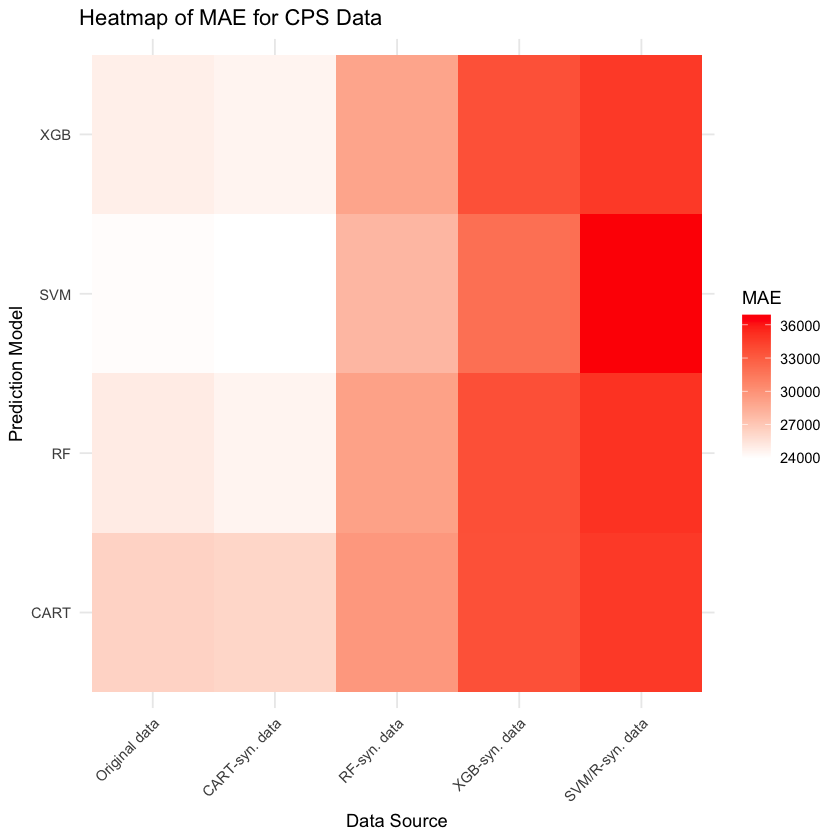

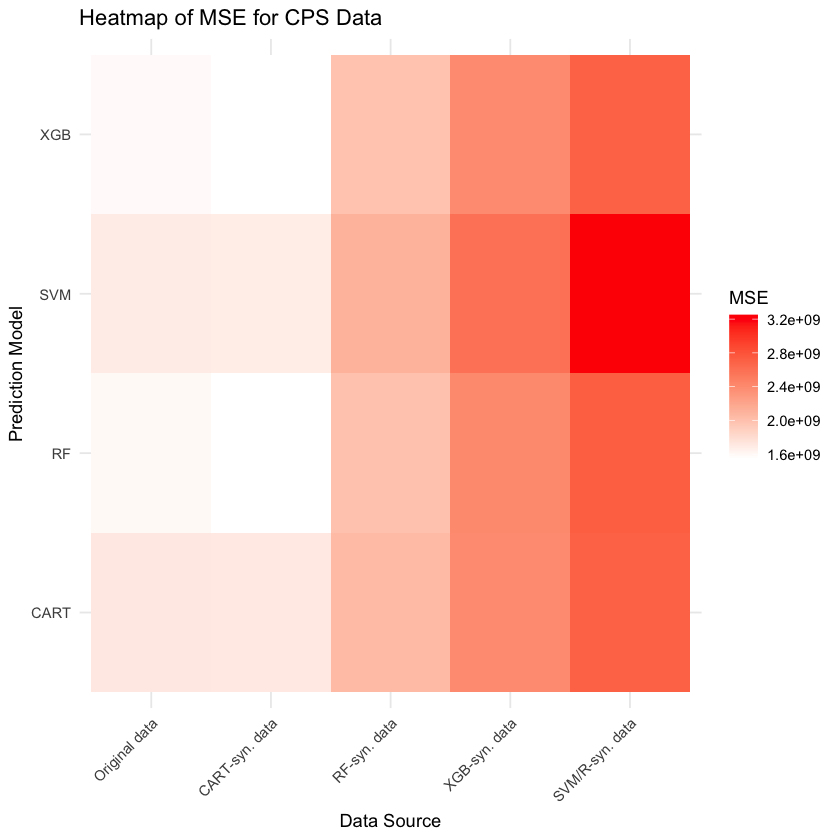

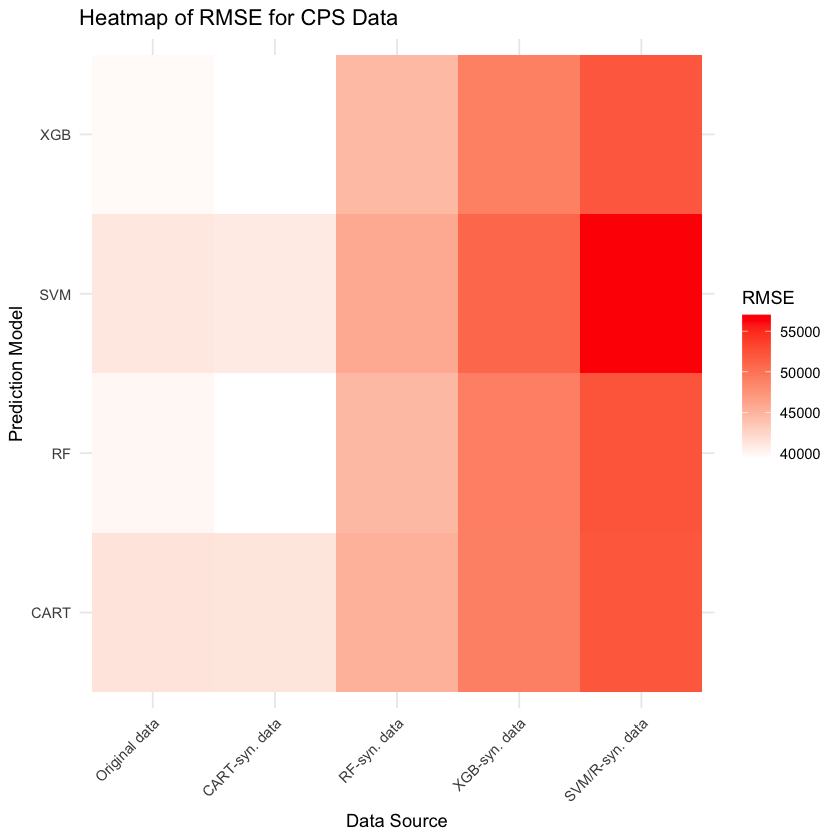

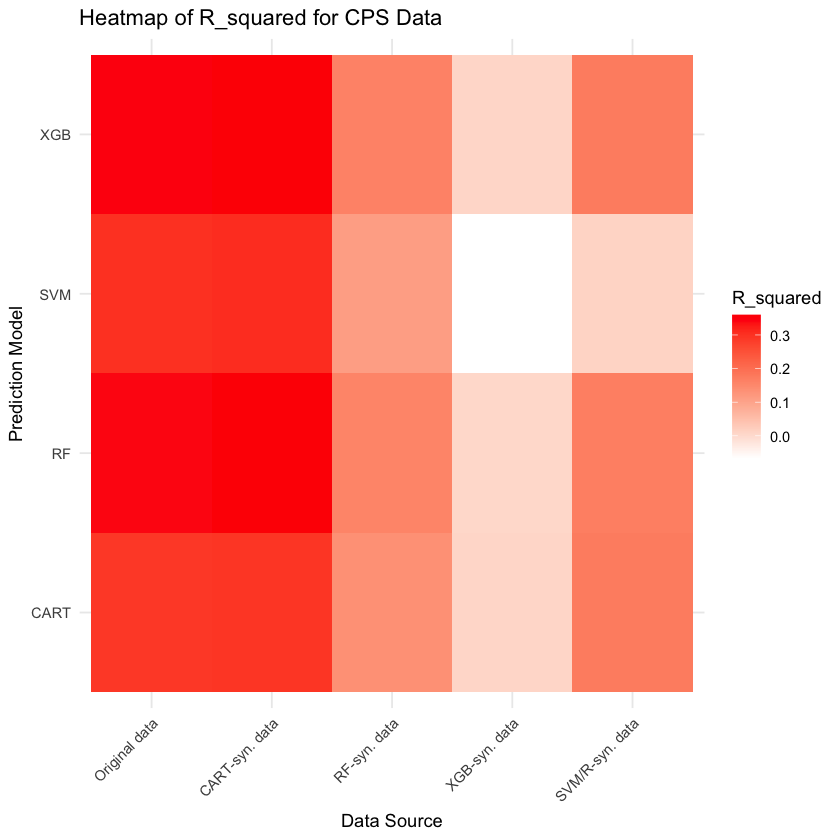

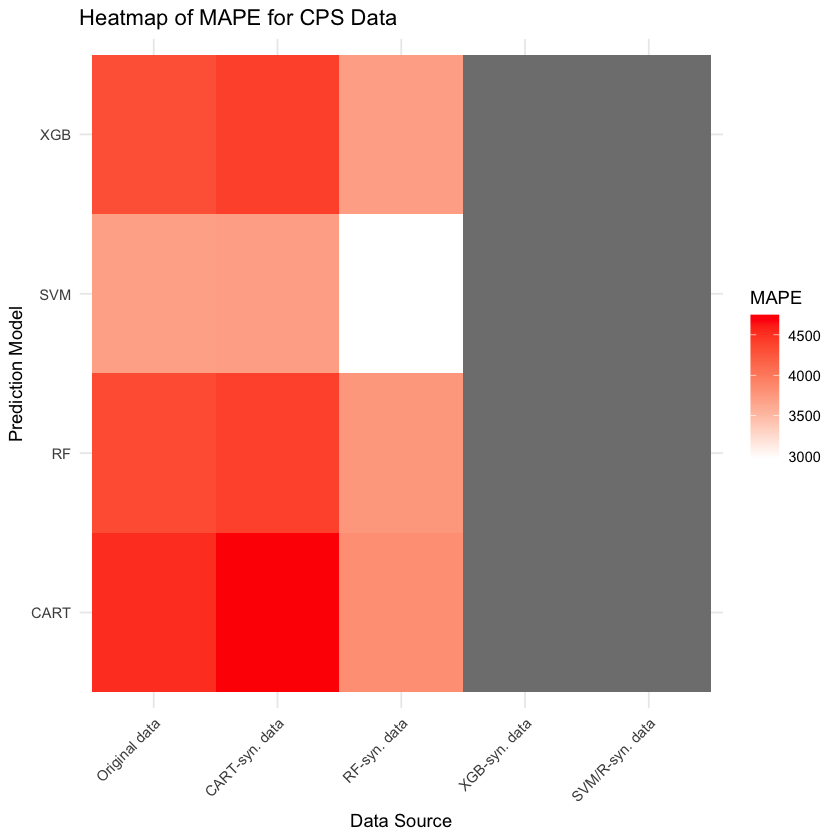

In [33]:
# CPS Data for heatmaps
cps_heatmap_data <- cps_table

# Iterate over each metric in the cps data
for (metric in metrics_regression) {
  # Filter the table for the current metric
  metric_data <- cps_heatmap_data[cps_heatmap_data$Metric == metric, ]
  
  # Melt the data into long format for ggplot
  metric_data_melt <- melt(metric_data, id.vars = c("Prediction Model", "Metric"))
  
  # Create the heatmap
  p <- ggplot(metric_data_melt, aes(x = variable, y = `Prediction Model`, fill = as.numeric(value))) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "red", name = metric) +  # Set the name to the metric
    labs(title = paste("Heatmap of", metric, "for CPS Data"), x = "Data Source", y = "Prediction Model") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability
  
  # Print the heatmap
  print(p)
}


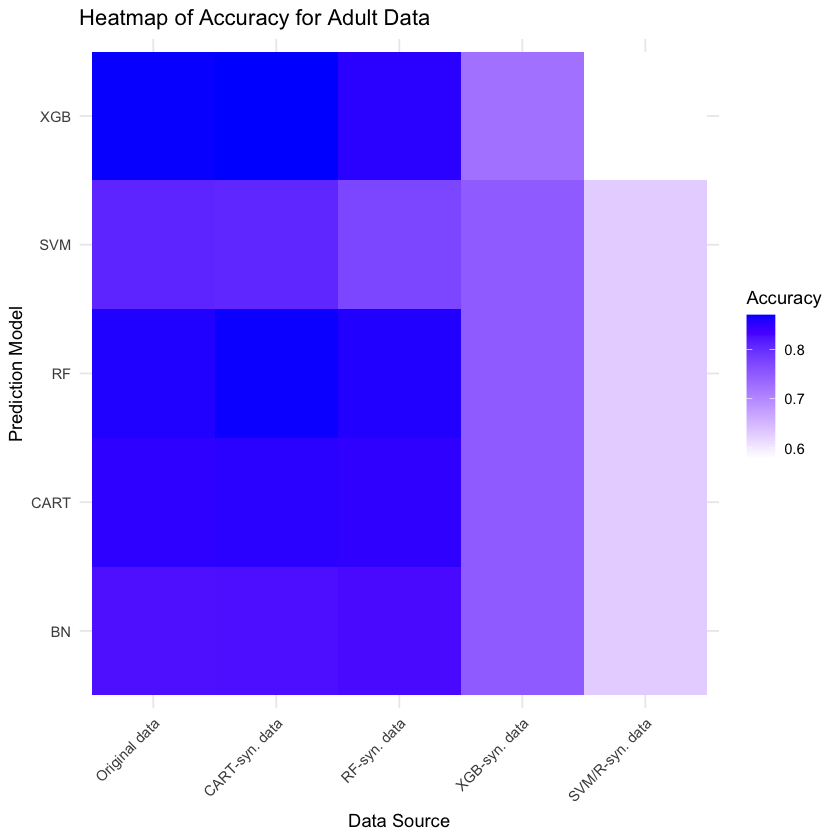

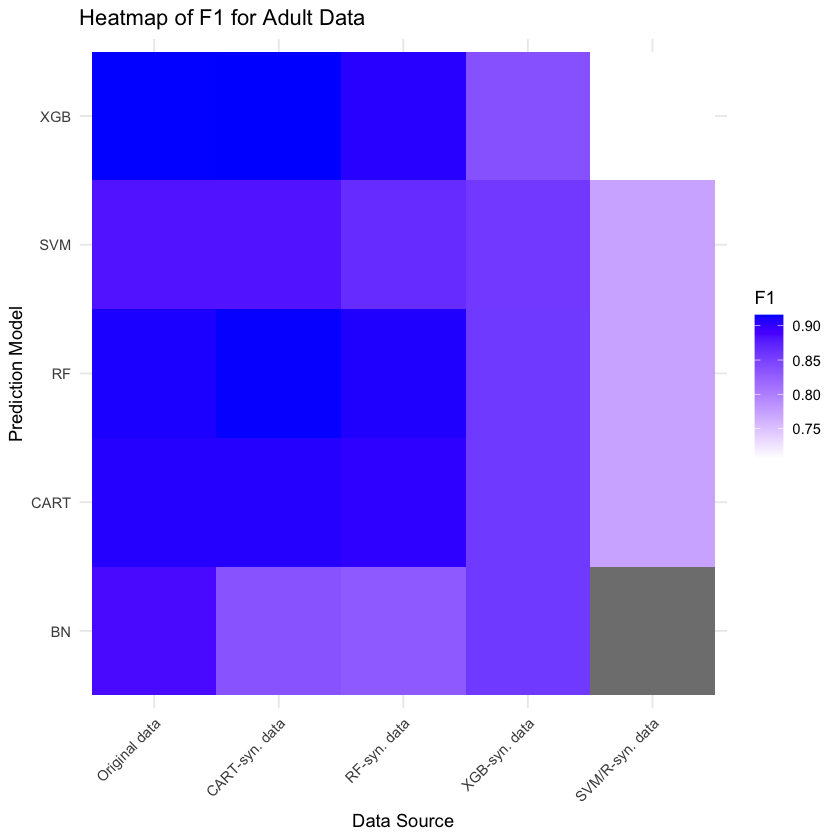

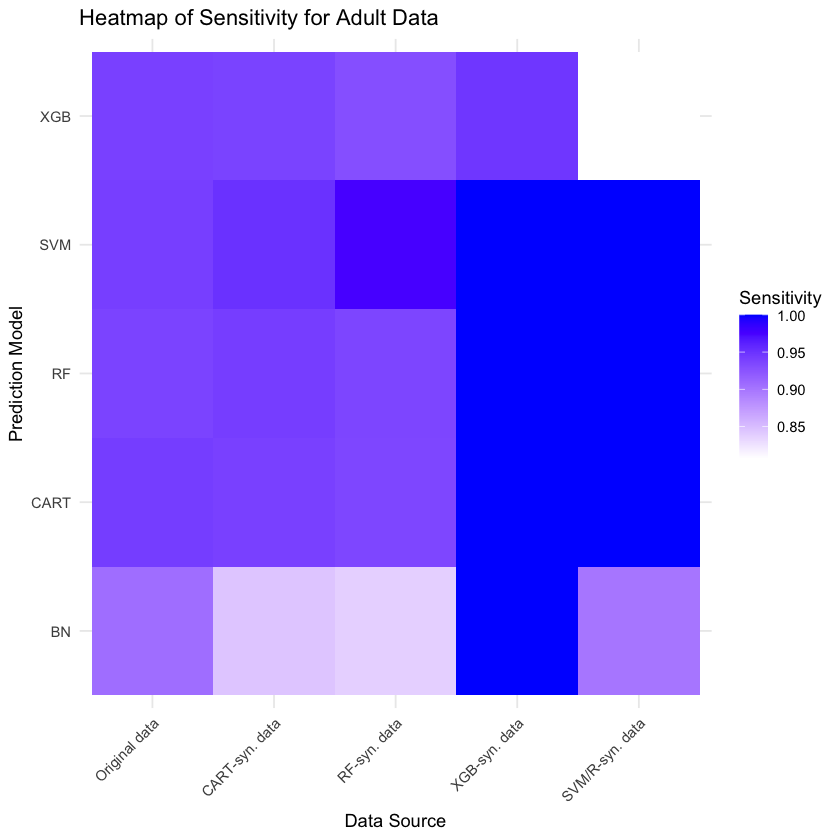

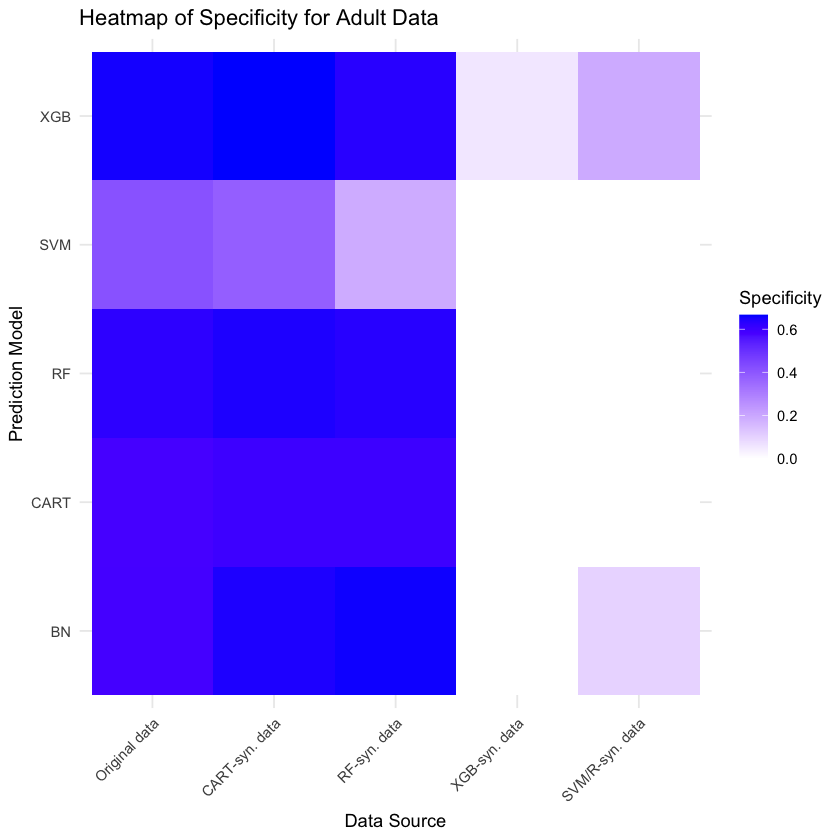

In [34]:
# Adult Data for heatmaps
adult_heatmap_data <- adult_table

# Iterate over each metric in the adult data
for (metric in metrics_classification) {
  # Filter the table for the current metric
  metric_data <- adult_heatmap_data[adult_heatmap_data$Metric == metric, ]
  
  # Melt the data into long format for ggplot
  metric_data_melt <- melt(metric_data, id.vars = c("Prediction Model", "Metric"))
  
  # Create the heatmap
  p <- ggplot(metric_data_melt, aes(x = variable, y = `Prediction Model`, fill = as.numeric(value))) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "blue", name = metric) +  # Set the name to the metric
    labs(title = paste("Heatmap of", metric, "for Adult Data"), x = "Data Source", y = "Prediction Model") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability
  
  # Print the heatmap
  print(p)
}


## Prediction on Original data

### CPS orig

In [35]:
cps_og <- averaged_data[["cps_og"]]
(cps_og <- cps_og[, !colnames(cps_og) %in% "MAPE"])


,MAE,MSE,RMSE,R_squared
,<dbl>,<dbl>,<dbl>,<dbl>
CART,26343.33,1714859597,41407.16,0.2916392
RF,25034.96,1595924954,39942.33,0.3408800
XGB,24831.14,1583878594,39790.27,0.3459001
SVM,24080.63,1689493174,41097.85,0.3022338


In [36]:
options(scipen = 999)

In [37]:
# Convert the relevant columns back to numeric if needed, then round them
cps_og$MAE <- as.numeric(cps_og$MAE)
cps_og$MSE <- as.numeric(cps_og$MSE)
cps_og$RMSE <- as.numeric(cps_og$RMSE)
cps_og$R_squared <- as.numeric(cps_og$R_squared)

# Format numeric columns to 4 decimal places
cps_og[] <- lapply(cps_og, function(x) {
  if(is.numeric(x)) {
    format(x, digits = 4, nsmall = 4) # 4 decimal places
  } else {
    x # Non-numeric columns are left unchanged
  }
})

# Convert dataframe to xtable
xtable_cps_og <- xtable(cps_og, 
                        caption = "CPS Original Data Prediction Metrics", 
                        label = "tab:cps_orig")

# Print the xtable with the desired formatting
print(xtable_cps_og, include.rownames = TRUE, sanitize.text.function = identity)


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:50 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & MAE & MSE & RMSE & R_squared \\ 
  \hline
CART & 26343.3260 & 1714859596.8643 & 41407.1578 & 0.2916 \\ 
  RF & 25034.9584 & 1595924953.7000 & 39942.3272 & 0.3409 \\ 
  XGB & 24831.1398 & 1583878594.2573 & 39790.2731 & 0.3459 \\ 
  SVM & 24080.6321 & 1689493173.7316 & 41097.8532 & 0.3022 \\ 
   \hline
\end{tabular}
\caption{CPS Original Data Prediction Metrics} 
\label{tab:cps_orig}
\end{table}


### Adult orig

In [38]:
adult_og <- averaged_data[["adult_og"]]
(adult_og <- adult_og[rownames(adult_og) != "BN", ])


,Accuracy,F1,Sensitivity,Specificity
,<dbl>,<dbl>,<dbl>,<dbl>
CART,0.8534414,0.9062172,0.9427518,0.5839644
RF,0.8608482,0.9101478,0.9383376,0.6270382
XGB,0.8689708,0.9150572,0.9396884,0.6555945
SVM,0.8107187,0.8825387,0.9416128,0.4157693


In [39]:
# Format all numeric columns to 4 decimal places
adult_og[] <- lapply(adult_og, function(x) {
  if(is.numeric(x)) {
    format(x, digits = 4, nsmall = 4) # 4 decimal places
  } else {
    x # Non-numeric columns are left unchanged
  }
})

# Convert dataframe to xtable
xtable_adult_og <- xtable(adult_og, 
                            caption = "Adult Original Data Prediction Metrics", 
                            label = "tab:adult_orig")

# Print the xtable without rounding
print(xtable_adult_og, include.rownames = TRUE, sanitize.text.function = identity)


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:51 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & Accuracy & F1 & Sensitivity & Specificity \\ 
  \hline
CART & 0.8534 & 0.9062 & 0.9428 & 0.5840 \\ 
  RF & 0.8608 & 0.9101 & 0.9383 & 0.6270 \\ 
  XGB & 0.8690 & 0.9151 & 0.9397 & 0.6556 \\ 
  SVM & 0.8107 & 0.8825 & 0.9416 & 0.4158 \\ 
   \hline
\end{tabular}
\caption{Adult Original Data Prediction Metrics} 
\label{tab:adult_orig}
\end{table}


### CPS discretized orig

In [40]:
rownames(averaged_data[["cps_orig_dis_bn_pred"]]) <- "BN"
(cps_orig_dis <- rbind(averaged_data[["cps_orig_dis"]], averaged_data[["cps_orig_dis_bn_pred"]]))

,Accuracy,F1,Sensitivity,Specificity
,<dbl>,<dbl>,<dbl>,<dbl>
CART,0.9603791,0.9797912,0.2199971,0.8000166
RF,0.9603932,0.9797965,0.2200000,0.8000000
XGB,0.9604114,0.9019285,0.2201137,0.8000919
SVM,0.9603932,0.9797965,0.2200000,0.8000000
BN,0.9603940,0.9797969,0.2200000,0.8000000


In [41]:
cps_orig_dis[] <- lapply(cps_orig_dis, function(x) {
  if(is.numeric(x)) {
    format(x, digits = 4, nsmall = 4) # 7 decimal places
  } else {
    x # Non-numeric columns are left unchanged
  }
})

# Convert the dataframe to an xtable
xtable_cps_orig_dis <- xtable(cps_orig_dis, 
                              caption = "CPS Original Data Prediction Metrics", 
                              label = "tab:cps_orig_dis")

# Print the xtable without rounding
print(xtable_cps_orig_dis, include.rownames = TRUE, sanitize.text.function = identity)

% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:51 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & Accuracy & F1 & Sensitivity & Specificity \\ 
  \hline
CART & 0.9604 & 0.9798 & 0.2200 & 0.8000 \\ 
  RF & 0.9604 & 0.9798 & 0.2200 & 0.8000 \\ 
  XGB & 0.9604 & 0.9019 & 0.2201 & 0.8001 \\ 
  SVM & 0.9604 & 0.9798 & 0.2200 & 0.8000 \\ 
  BN & 0.9604 & 0.9798 & 0.2200 & 0.8000 \\ 
   \hline
\end{tabular}
\caption{CPS Original Data Prediction Metrics} 
\label{tab:cps_orig_dis}
\end{table}


### Adult discretized orig

In [42]:
(adult_orig_dis <- averaged_data[["adult_orig_dis"]])

,Accuracy,F1,Sensitivity,Specificity
,<dbl>,<dbl>,<dbl>,<dbl>
CART,0.8316757,0.8916508,0.9221991,0.5585375
RF,0.8371926,0.8951397,0.9252052,0.5716326
XGB,0.8431968,0.8981551,0.9205837,0.6096967
SVM,0.8152872,0.8833293,0.9305817,0.4674074
BN,0.8262161,0.8866629,0.9053639,0.5876945


In [43]:
# Extract the 'adult_orig_dis' dataframe
adult_orig_dis <- averaged_data[["adult_orig_dis"]]

adult_orig_dis[] <- lapply(adult_orig_dis, function(x) {
  if(is.numeric(x)) {
    format(x, digits = 4, nsmall = 4) # 4 decimal places
  } else {
    x # Non-numeric columns are left unchanged
  }
})

# Convert the dataframe to an xtable
xtable_adult_orig_dis <- xtable(adult_orig_dis, 
                                caption = "Adult Discretized Data Prediction Metrics", 
                                label = "tab:adult_orig_dis")

# Print the xtable without rounding
print(xtable_adult_orig_dis, include.rownames = TRUE, sanitize.text.function = identity)


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:51 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & Accuracy & F1 & Sensitivity & Specificity \\ 
  \hline
CART & 0.8317 & 0.8917 & 0.9222 & 0.5585 \\ 
  RF & 0.8372 & 0.8951 & 0.9252 & 0.5716 \\ 
  XGB & 0.8432 & 0.8982 & 0.9206 & 0.6097 \\ 
  SVM & 0.8153 & 0.8833 & 0.9306 & 0.4674 \\ 
  BN & 0.8262 & 0.8867 & 0.9054 & 0.5877 \\ 
   \hline
\end{tabular}
\caption{Adult Discretized Data Prediction Metrics} 
\label{tab:adult_orig_dis}
\end{table}


## Prediction on CART data

In [44]:
# Extract the dataframes from averaged_data
cps_cart <- averaged_data[["cps_cart"]]
adult_cart <- averaged_data[["adult_cart"]]

# Filter out BN row and MAPE column
adult_cart <- adult_cart[rownames(adult_cart) != "BN", ]
cps_cart <- cps_cart[, !colnames(cps_cart) %in% "MAPE"]

# Format all numeric columns to 7 decimal places
cps_cart[] <- lapply(cps_cart, function(x) {
  if (is.numeric(x)) {
    format(x, digits = 7, nsmall = 7) # Retain 7 decimal places
  } else {
    x # Non-numeric columns are left unchanged
  }
})

# Format all numeric columns to 7 decimal places
adult_cart[] <- lapply(adult_cart, function(x) {
  if (is.numeric(x)) {
    format(x, digits = 7, nsmall = 7) # Retain 7 decimal places
  } else {
    x # Non-numeric columns are left unchanged
  }
})

# Convert dataframes to xtable
xtable_cps_cart <- xtable(cps_cart, 
                          caption = "CPS CART-Synthesized Data Prediction Metrics", 
                          label = "tab:cps_cart")

xtable_adult_cart <- xtable(adult_cart, 
                            caption = "Adult CART-Synthesized Data Prediction Metrics", 
                            label = "tab:adult_cart")

# Print the xtables without rounding
print(xtable_cps_cart, include.rownames = TRUE, sanitize.text.function = identity)
print(xtable_adult_cart, include.rownames = TRUE, sanitize.text.function = identity)


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:51 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & MAE & MSE & RMSE & R_squared \\ 
  \hline
CART & 26178.4902695 & 1705863260.3988602 & 41289.5052688 & 0.2952757 \\ 
  RF & 24540.4966460 & 1549769835.4098353 & 39356.3951169 & 0.3597545 \\ 
  XGB & 24510.8488644 & 1549601719.9055719 & 39355.7747158 & 0.3597220 \\ 
  SVM & 23928.5528633 & 1676849659.6953473 & 40938.4980827 & 0.3072423 \\ 
   \hline
\end{tabular}
\caption{CPS CART-Synthesized Data Prediction Metrics} 
\label{tab:cps_cart}
\end{table}
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:51 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & Accuracy & F1 & Sensitivity & Specificity \\ 
  \hline
CART & 0.8546714 & 0.9065522 & 0.9398256 & 0.5989968 \\ 
  RF & 0.8685068 & 0.9148870 & 0.9421881 & 0.6473191 \\ 
  XGB & 0.8706121 & 0.9158385 & 0.9386075 & 0.6665026 \\ 
  SVM & 0.8080343 & 

with differences included

In [45]:
# Ensure the original data rows match the synthetic data columns
cps_og <- cps_og[, colnames(cps_cart)]
adult_og <- adult_og[, colnames(adult_cart)]

# Initialize empty lists to store updated dataframes
cps_cart_with_diff <- list()
adult_cart_with_diff <- list()

# Function to add the difference rows for each model
add_difference_rows <- function(model_data, original_data) {
  updated_data <- data.frame()  # Initialize an empty dataframe to store the rows and differences
  
  for (model in rownames(model_data)) {
    # Get the original and synthetic data rows for the current model
    synthetic_row <- as.numeric(model_data[model, ])
    original_row <- as.numeric(original_data[model, ])
    
    # Compute the difference
    diff_row <- synthetic_row - original_row
    
    # Create dataframes for the synthetic and difference rows
    synthetic_row_df <- data.frame(t(synthetic_row), check.names = FALSE)
    diff_row_df <- data.frame(t(diff_row), check.names = FALSE)
    
    # Set the column names for both rows to match the original dataframe
    colnames(synthetic_row_df) <- colnames(model_data)
    colnames(diff_row_df) <- colnames(model_data)
    
    # Name the rows accordingly, using a space instead of an underscore
    rownames(synthetic_row_df) <- model
    rownames(diff_row_df) <- paste(model, "Diff.")
    
    # Add the synthetic row and its difference to the updated dataframe
    updated_data <- rbind(updated_data, synthetic_row_df, diff_row_df)
  }
  
  return(updated_data)
}

# Apply the function to both cps and adult data
cps_cart_with_diff <- add_difference_rows(cps_cart, cps_og)
adult_cart_with_diff <- add_difference_rows(adult_cart, adult_og)

# Format columns with different decimal places for cps_cart_with_diff
cps_cart_with_diff[] <- lapply(names(cps_cart_with_diff), function(col) {
  if (col %in% c("MAE", "MSE", "RMSE")) {
    format(round(as.numeric(cps_cart_with_diff[[col]]), 2), nsmall = 2) # 2 decimal places
  } else if (col == "R_squared") {
    format(round(as.numeric(cps_cart_with_diff[[col]]), 4), nsmall = 4) # 4 decimal places
  } else {
    cps_cart_with_diff[[col]] # Non-numeric columns remain unchanged
  }
})

# Format all numeric columns in adult_cart_with_diff to 4 decimal places
adult_cart_with_diff[] <- lapply(adult_cart_with_diff, function(x) {
  if (is.numeric(x)) {
    format(round(x, digits = 4), nsmall = 4) # Ensure 4 decimal places
  } else {
    x # Non-numeric columns remain unchanged
  }
})

# Convert dataframes to xtable with case-sensitive captions
xtable_cps_cart <- xtable(cps_cart_with_diff, 
                          caption = "CPS CART-synth. data: prediction metrics and difference to original data", 
                          label = "tab:cps_cart")

xtable_adult_cart <- xtable(adult_cart_with_diff, 
                            caption = "Adult CART-synth. data: prediction metrics and difference to original data", 
                            label = "tab:adult_cart")

# Print the xtables without rounding, preserving case-sensitivity in captions
print(xtable_cps_cart, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")
print(xtable_adult_cart, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:51 2024
\begin{table}[ht]
\centering
\caption{CPS CART-synth. data: prediction metrics and difference to original data} 
\label{tab:cps_cart}
\begin{tabular}{rllll}
  \hline
 & MAE & MSE & RMSE & R_squared \\ 
  \hline
CART & 26178.49 & 1705863260.40 & 41289.51 & 0.2953 \\ 
  CART Diff. &  -164.84 &   -8996336.47 &  -117.65 & 0.0037 \\ 
  RF & 24540.50 & 1549769835.41 & 39356.40 & 0.3598 \\ 
  RF Diff. &  -494.46 &  -46155118.29 &  -585.93 & 0.0189 \\ 
  XGB & 24510.85 & 1549601719.91 & 39355.77 & 0.3597 \\ 
  XGB Diff. &  -320.29 &  -34276874.35 &  -434.50 & 0.0138 \\ 
  SVM & 23928.55 & 1676849659.70 & 40938.50 & 0.3072 \\ 
  SVM Diff. &  -152.08 &  -12643514.04 &  -159.36 & 0.0050 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:51 2024
\begin{table}[ht]
\centering
\caption{Adult CART-synth. data: prediction metrics and difference to orig

## Prediction on RF data

In [46]:
# Extract the dataframes from averaged_data
cps_rf <- averaged_data[["cps_rf"]]
adult_rf <- averaged_data[["adult_rf"]]

cps_rf <- cps_rf[, colnames(cps_rf) != "MAPE"]
adult_rf <- adult_rf[rownames(adult_rf) != "BN", ]

In [47]:
# Remove the "MAPE" column from cps_rf to match columns with cps_og
cps_rf <- cps_rf[, colnames(cps_rf) != "MAPE"]

# Ensure the original data rows match the synthetic data columns
cps_og <- cps_og[, colnames(cps_rf)]
adult_og <- adult_og[, colnames(adult_rf)]

# Initialize empty lists to store updated dataframes
cps_rf_with_diff <- list()
adult_rf_with_diff <- list()

# Function to add the difference rows for each model
add_difference_rows <- function(model_data, original_data) {
  updated_data <- data.frame()  # Initialize an empty dataframe to store the rows and differences
  
  for (model in rownames(model_data)) {
    # Get the original and synthetic data rows for the current model
    synthetic_row <- as.numeric(model_data[model, ])
    original_row <- as.numeric(original_data[model, ])
    
    # Compute the difference
    diff_row <- synthetic_row - original_row
    
    # Create dataframes for the synthetic and difference rows
    synthetic_row_df <- data.frame(t(synthetic_row), check.names = FALSE)
    diff_row_df <- data.frame(t(diff_row), check.names = FALSE)
    
    # Set the column names for both rows to match the original dataframe
    colnames(synthetic_row_df) <- colnames(model_data)
    colnames(diff_row_df) <- colnames(model_data)
    
    # Name the rows accordingly, using a space instead of an underscore
    rownames(synthetic_row_df) <- model
    rownames(diff_row_df) <- paste(model, "Diff.")
    
    # Add the synthetic row and its difference to the updated dataframe
    updated_data <- rbind(updated_data, synthetic_row_df, diff_row_df)
  }
  
  return(updated_data)
}

# Apply the function to both cps and adult RF data
cps_rf_with_diff <- add_difference_rows(cps_rf, cps_og)
adult_rf_with_diff <- add_difference_rows(adult_rf, adult_og)

# Format specific columns with different decimal places in cps_rf_with_diff
cps_rf_with_diff[] <- lapply(names(cps_rf_with_diff), function(col) {
  if (col %in% c("MAE", "MSE", "RMSE")) {
    format(round(as.numeric(cps_rf_with_diff[[col]]), 2), nsmall = 2) # 2 decimal places
  } else if (col == "R_squared") {
    format(round(as.numeric(cps_rf_with_diff[[col]]), 4), nsmall = 4) # 4 decimal places
  } else {
    cps_rf_with_diff[[col]] # Non-numeric columns remain unchanged
  }
})

# Format all numeric columns in adult_rf_with_diff to 4 decimal places
adult_rf_with_diff[] <- lapply(adult_rf_with_diff, function(x) {
  if (is.numeric(x)) {
    format(round(x, digits = 4), nsmall = 4) # Ensure 4 decimal places
  } else {
    x # Non-numeric columns remain unchanged
  }
})

# Convert dataframes to xtable with case-sensitive captions
xtable_cps_rf <- xtable(cps_rf_with_diff, 
                          caption = "CPS RF-synthesized data: prediction metrics and difference to original data", 
                          label = "tab:cps_rf")

xtable_adult_rf <- xtable(adult_rf_with_diff, 
                            caption = "Adult RF-synthesized data: prediction metrics with difference to original data", 
                            label = "tab:adult_rf")

# Print the xtables without rounding, preserving case-sensitivity in captions
print(xtable_cps_rf, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")
print(xtable_adult_rf, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:52 2024
\begin{table}[ht]
\centering
\caption{CPS RF-synthesized data: prediction metrics and difference to original data} 
\label{tab:cps_rf}
\begin{tabular}{rllll}
  \hline
 & MAE & MSE & RMSE & R_squared \\ 
  \hline
CART & 29679.63 & 2049007653.39 & 45256.92 &  0.1365 \\ 
  CART Diff. &  3336.31 &  334148056.52 &  3849.76 & -0.1551 \\ 
  RF & 29138.62 & 1996587550.42 & 44670.70 &  0.1587 \\ 
  RF Diff. &  4103.66 &  400662596.72 &  4728.37 & -0.1822 \\ 
  XGB & 28986.37 & 1988414595.86 & 44579.56 &  0.1621 \\ 
  XGB Diff. &  4155.23 &  404536001.61 &  4789.28 & -0.1838 \\ 
  SVM & 27906.29 & 2106843603.44 & 45892.21 &  0.1122 \\ 
  SVM Diff. &  3825.66 &  417350429.71 &  4794.36 & -0.1900 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:52 2024
\begin{table}[ht]
\centering
\caption{Adult RF-synthesized data: prediction metrics with diffe

## Prediction on XGB data

In [48]:
# Extract the dataframes from averaged_data
cps_xgb <- averaged_data[["cps_xgb"]]
adult_xgb <- averaged_data[["adult_xgb"]]
cps_xgb <- cps_xgb[, colnames(cps_xgb) != "MAPE"]
adult_xgb <- adult_xgb[rownames(adult_xgb) != "BN", ]

In [49]:
# Ensure the original data rows match the synthetic data columns
cps_og <- cps_og[, colnames(cps_xgb)]
adult_og <- adult_og[, colnames(adult_xgb)]

# Initialize empty lists to store updated dataframes
cps_xgb_with_diff <- list()
adult_xgb_with_diff <- list()

# Function to add the difference rows for each model
add_difference_rows <- function(model_data, original_data) {
  updated_data <- data.frame()  # Initialize an empty dataframe to store the rows and differences
  
  for (model in rownames(model_data)) {
    # Get the original and synthetic data rows for the current model
    synthetic_row <- as.numeric(model_data[model, ])
    original_row <- as.numeric(original_data[model, ])
    
    # Compute the difference
    diff_row <- synthetic_row - original_row
    
    # Create dataframes for the synthetic and difference rows
    synthetic_row_df <- data.frame(t(synthetic_row), check.names = FALSE)
    diff_row_df <- data.frame(t(diff_row), check.names = FALSE)
    
    # Set the column names for both rows to match the original dataframe
    colnames(synthetic_row_df) <- colnames(model_data)
    colnames(diff_row_df) <- colnames(model_data)
    
    # Name the rows accordingly, using a space instead of an underscore
    rownames(synthetic_row_df) <- model
    rownames(diff_row_df) <- paste(model, "Diff.")
    
    # Add the synthetic row and its difference to the updated dataframe
    updated_data <- rbind(updated_data, synthetic_row_df, diff_row_df)
  }
  
  return(updated_data)
}

# Apply the function to both cps and adult data
cps_xgb_with_diff <- add_difference_rows(cps_xgb, cps_og)
adult_xgb_with_diff <- add_difference_rows(adult_xgb, adult_og)

# Format specific columns with different decimal places in cps_xgb_with_diff
cps_xgb_with_diff[] <- lapply(names(cps_xgb_with_diff), function(col) {
  if (col %in% c("MAE", "MSE", "RMSE")) {
    format(round(as.numeric(cps_xgb_with_diff[[col]]), 2), nsmall = 2) # 2 decimal places
  } else if (col == "R_squared") {
    format(round(as.numeric(cps_xgb_with_diff[[col]]), 4), nsmall = 4) # 4 decimal places
  } else {
    cps_xgb_with_diff[[col]] # Non-numeric columns remain unchanged
  }
})

# Format all numeric columns in adult_xgb_with_diff to 4 decimal places
adult_xgb_with_diff[] <- lapply(adult_xgb_with_diff, function(x) {
  if (is.numeric(x)) {
    format(round(x, digits = 4), nsmall = 4) # Ensure 4 decimal places
  } else {
    x # Non-numeric columns remain unchanged
  }
})

# Convert dataframes to xtable with case-sensitive captions
xtable_cps_xgb <- xtable(cps_xgb_with_diff, 
                          caption = "CPS XGB-synth. data: prediction metrics and difference to original data", 
                          label = "tab:cps_xgb")

xtable_adult_xgb <- xtable(adult_xgb_with_diff, 
                            caption = "Adult XGB-synth. data: prediction metrics and difference to original data", 
                            label = "tab:adult_xgb")

# Print the xtables without rounding, preserving case-sensitivity in captions
print(xtable_cps_xgb, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")
print(xtable_adult_xgb, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:52 2024
\begin{table}[ht]
\centering
\caption{CPS XGB-synth. data: prediction metrics and difference to original data} 
\label{tab:cps_xgb}
\begin{tabular}{rllll}
  \hline
 & MAE & MSE & RMSE & R_squared \\ 
  \hline
CART & 33607.18 & 2404325889.05 & 49024.05 &  0.0079 \\ 
  CART Diff. &  7263.85 &  689466292.18 &  7616.90 & -0.2837 \\ 
  RF & 33686.01 & 2410918011.79 & 49093.20 &  0.0052 \\ 
  RF Diff. &  8651.05 &  814993058.09 &  9150.88 & -0.3357 \\ 
  XGB & 33615.57 & 2400645692.00 & 48988.35 &  0.0093 \\ 
  XGB Diff. &  8784.43 &  816767097.74 &  9198.08 & -0.3366 \\ 
  SVM & 31962.07 & 2586428611.78 & 50850.02 & -0.0672 \\ 
  SVM Diff. &  7881.44 &  896935438.05 &  9752.17 & -0.3694 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:52 2024
\begin{table}[ht]
\centering
\caption{Adult XGB-synth. data: prediction metrics and difference to

## Prediction on SVM data

In [50]:
# Extract the dataframes from averaged_data
cps_svm <- averaged_data[["cps_svm"]]
cps_svm <- cps_svm[, colnames(cps_svm) != "MAPE"]
adult_svm <- averaged_data[["adult_svm"]]
adult_svm <- adult_svm[rownames(adult_svm) != "BN", ]
adult_svm

,Accuracy,F1,Sensitivity,Specificity
,<dbl>,<dbl>,<dbl>,<dbl>
CART,0.6287746,0.7720786,0.9999631,0.00001784917
RF,0.6287415,0.7720435,0.9998526,0.00011605572
XGB,0.5786586,0.7066187,0.8070111,0.19180857134
SVM,0.6287912,0.7720930,1.0000000,0.00000000000


In [51]:
# Ensure the original data rows match the synthetic data columns
cps_og <- cps_og[, colnames(cps_svm)]
adult_og <- adult_og[, colnames(adult_svm)]

# Initialize empty lists to store updated dataframes
cps_svm_with_diff <- list()
adult_svm_with_diff <- list()

# Function to add the difference rows for each model
add_difference_rows <- function(model_data, original_data) {
  updated_data <- data.frame()  # Initialize an empty dataframe to store the rows and differences
  
  for (model in rownames(model_data)) {
    # Get the original and synthetic data rows for the current model
    synthetic_row <- as.numeric(model_data[model, ])
    original_row <- as.numeric(original_data[model, ])
    
    # Compute the difference
    diff_row <- synthetic_row - original_row
    
    # Create dataframes for the synthetic and difference rows
    synthetic_row_df <- data.frame(t(synthetic_row), check.names = FALSE)
    diff_row_df <- data.frame(t(diff_row), check.names = FALSE)
    
    # Set the column names for both rows to match the original dataframe
    colnames(synthetic_row_df) <- colnames(model_data)
    colnames(diff_row_df) <- colnames(model_data)
    
    # Name the rows accordingly, using "Diff." for the difference row
    rownames(synthetic_row_df) <- model
    rownames(diff_row_df) <- paste(model, "Diff.")
    
    # Add the synthetic row and its difference to the updated dataframe
    updated_data <- rbind(updated_data, synthetic_row_df, diff_row_df)
  }
  
  return(updated_data)
}

# Apply the function to both cps and adult SVM data
cps_svm_with_diff <- add_difference_rows(cps_svm, cps_og)
adult_svm_with_diff <- add_difference_rows(adult_svm, adult_og)

# Format specific columns with different decimal places in cps_svm_with_diff
cps_svm_with_diff[] <- lapply(names(cps_svm_with_diff), function(col) {
  if (col %in% c("MAE", "MSE", "RMSE")) {
    format(round(as.numeric(cps_svm_with_diff[[col]]), 2), nsmall = 2) # 2 decimal places
  } else if (col == "R_squared") {
    format(round(as.numeric(cps_svm_with_diff[[col]]), 4), nsmall = 4) # 4 decimal places
  } else {
    cps_svm_with_diff[[col]] # Non-numeric columns remain unchanged
  }
})

# Format all numeric columns in adult_svm_with_diff to 4 decimal places
adult_svm_with_diff[] <- lapply(adult_svm_with_diff, function(x) {
  if (is.numeric(x)) {
    format(round(x, digits = 4), nsmall = 4) # Ensure 4 decimal places
  } else {
    x # Non-numeric columns remain unchanged
  }
})

# Convert dataframes to xtable with case-sensitive captions
xtable_cps_svm <- xtable(cps_svm_with_diff, 
                          caption = "CPS SVM-synth. data: prediction metrics and difference to original data", 
                          label = "tab:cps_svm")

xtable_adult_svm <- xtable(adult_svm_with_diff, 
                            caption = "Adult SVM-synth. data: prediction metrics and difference to original data", 
                            label = "tab:adult_svm")

# Print the xtables without rounding, preserving case-sensitivity in captions
print(xtable_cps_svm, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")
print(xtable_adult_svm, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:52 2024
\begin{table}[ht]
\centering
\caption{CPS SVM-synth. data: prediction metrics and difference to original data} 
\label{tab:cps_svm}
\begin{tabular}{rllll}
  \hline
 & MAE & MSE & RMSE & R_squared \\ 
  \hline
CART & 34741.17 & 2709944633.76 & 52049.42 &  0.1758 \\ 
  CART Diff. &  8397.84 &  995085036.90 & 10642.26 & -0.1158 \\ 
  RF & 35060.57 & 2730284434.03 & 52240.53 &  0.1696 \\ 
  RF Diff. & 10025.61 & 1134359480.33 & 12298.20 & -0.1713 \\ 
  XGB & 34756.98 & 2709118990.40 & 52038.56 &  0.1760 \\ 
  XGB Diff. &  9925.84 & 1125240396.14 & 12248.29 & -0.1699 \\ 
  SVM & 36900.76 & 3250277079.95 & 57003.24 &  0.0114 \\ 
  SVM Diff. & 12820.13 & 1560783906.22 & 15905.39 & -0.2908 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:52 2024
\begin{table}[ht]
\centering
\caption{Adult SVM-synth. data: prediction metrics and difference to

## Prediction on BN data

In [52]:
# Extract the dataframes from averaged_data
cps_bn <- rbind(averaged_data[["cps_bn"]], averaged_data[["cps_bn_bn_pred"]])
rownames(cps_bn)[nrow(cps_bn)] <- "BN"
adult_bn <- averaged_data[["adult_bn"]]

# Format all numeric columns to 7 decimal places
cps_bn[] <- lapply(cps_bn, function(x) {
  if (is.numeric(x)) {
    format(x, digits = 4, nsmall = 4) # Retain 7 decimal places
  } else {
    x # Non-numeric columns are left unchanged
  }
})

# Format all numeric columns to 7 decimal places
adult_bn[] <- lapply(adult_bn, function(x) {
  if (is.numeric(x)) {
    format(x, digits = 4, nsmall = 4) # Retain 7 decimal places
  } else {
    x # Non-numeric columns are left unchanged
  }
})

# Convert dataframes to xtable
xtable_cps_bn <- xtable(cps_bn, 
                        caption = "CPS BN-Synthesized Data Prediction Metrics", 
                        label = "tab:cps_bn")

xtable_adult_bn <- xtable(adult_bn, 
                          caption = "Adult BN-Synthesized Data Prediction Metrics", 
                          label = "tab:adult_bn")

# Print the xtables without rounding
print(xtable_cps_bn, include.rownames = TRUE, sanitize.text.function = identity)
print(xtable_adult_bn, include.rownames = TRUE, sanitize.text.function = identity)


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:53 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & Accuracy & F1 & Sensitivity & Specificity \\ 
  \hline
CART & 0.9600 & 0.9796 & 0.2190 & 0.8000 \\ 
  RF & 0.9600 & 0.9699 & 0.2190 & 0.8000 \\ 
  XGB & 0.9600 & 0.9699 & 0.2190 & 0.8000 \\ 
  SVM & 0.9600 & 0.9796 & 0.2190 & 0.8000 \\ 
  BN & 0.9600 & 0.9796 & 0.2190 & 0.8000 \\ 
   \hline
\end{tabular}
\caption{CPS BN-Synthesized Data Prediction Metrics} 
\label{tab:cps_bn}
\end{table}
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:53 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & Accuracy & F1 & Sensitivity & Specificity \\ 
  \hline
CART & 0.8344 & 0.8946 & 0.9300 & 0.5393 \\ 
  RF & 0.8365 & 0.8959 & 0.9313 & 0.5438 \\ 
  XGB & 0.8421 & 0.8988 & 0.9289 & 0.5737 \\ 
  SVM & 0.8185 & 0.8869 & 0.9404 & 0.4423 \\ 
  BN & 0.8430 & 0.8478 & 0.8561 & 0.6564 \\ 
   \hline
\end{tabular}
\ca

In [53]:
# Initialize empty dataframes to store updated CPS and Adult BN data
cps_bn_with_diff <- data.frame()
adult_bn_with_diff <- data.frame()

# Function to add the difference rows for each model
add_difference_rows <- function(synthetic_data, original_data) {
  updated_data <- data.frame()  # Initialize an empty dataframe to store the rows and differences
  
  for (model in rownames(synthetic_data)) {
    # Get the original and synthetic data rows for the current model
    synthetic_row <- as.numeric(synthetic_data[model, ])
    original_row <- as.numeric(original_data[model, ])
    
    # Compute the difference
    diff_row <- synthetic_row - original_row
    
    # Create dataframes for the synthetic and difference rows
    synthetic_row_df <- data.frame(t(synthetic_row), check.names = FALSE)
    diff_row_df <- data.frame(t(diff_row), check.names = FALSE)
    
    # Set the column names for both rows to match the original dataframe
    colnames(synthetic_row_df) <- colnames(synthetic_data)
    colnames(diff_row_df) <- colnames(synthetic_data)
    
    # Name the rows accordingly, using "Diff." for the difference row
    rownames(synthetic_row_df) <- model
    rownames(diff_row_df) <- paste(model, "Diff.")
    
    # Add the synthetic row and its difference to the updated dataframe
    updated_data <- rbind(updated_data, synthetic_row_df, diff_row_df)
  }
  
  return(updated_data)
}

# Apply the function to both cps_bn and adult_bn data using their original counterparts
cps_bn_with_diff <- add_difference_rows(cps_bn, cps_orig_dis)
adult_bn_with_diff <- add_difference_rows(adult_bn, adult_orig_dis)

# Format numeric columns in cps_bn_with_diff to 7 decimal places
cps_bn_with_diff[] <- lapply(cps_bn_with_diff, function(x) {
  if (is.numeric(x)) {
    format(round(as.numeric(x), digits = 4), nsmall = 4)
  } else {
    x
  }
})

# Format numeric columns in adult_bn_with_diff to 7 decimal places
adult_bn_with_diff[] <- lapply(adult_bn_with_diff, function(x) {
  if (is.numeric(x)) {
    format(round(as.numeric(x), digits = 4), nsmall = 4)
  } else {
    x
  }
})

# Convert dataframes to xtable with appropriate captions
xtable_cps_bn <- xtable(cps_bn_with_diff, 
                        caption = "CPS BN-Synthesized Data Prediction Metrics and Differences to Original Data", 
                        label = "tab:cps_bn")

xtable_adult_bn <- xtable(adult_bn_with_diff, 
                          caption = "Adult BN-Synthesized Data Prediction Metrics and Differences to Original Data", 
                          label = "tab:adult_bn")

# Print the xtables without rounding
print(xtable_cps_bn, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")
print(xtable_adult_bn, include.rownames = TRUE, sanitize.text.function = identity, caption.placement = "top")


% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:53 2024
\begin{table}[ht]
\centering
\caption{CPS BN-Synthesized Data Prediction Metrics and Differences to Original Data} 
\label{tab:cps_bn}
\begin{tabular}{rllll}
  \hline
 & Accuracy & F1 & Sensitivity & Specificity \\ 
  \hline
CART &  0.9600 &  0.9796 &  0.2190 &  0.8000 \\ 
  CART Diff. & -0.0004 & -0.0002 & -0.0010 &  0.0000 \\ 
  RF &  0.9600 &  0.9699 &  0.2190 &  0.8000 \\ 
  RF Diff. & -0.0004 & -0.0099 & -0.0010 &  0.0000 \\ 
  XGB &  0.9600 &  0.9699 &  0.2190 &  0.8000 \\ 
  XGB Diff. & -0.0004 &  0.0680 & -0.0011 & -0.0001 \\ 
  SVM &  0.9600 &  0.9796 &  0.2190 &  0.8000 \\ 
  SVM Diff. & -0.0004 & -0.0002 & -0.0010 &  0.0000 \\ 
  BN &  0.9600 &  0.9796 &  0.2190 &  0.8000 \\ 
  BN Diff. & -0.0004 & -0.0002 & -0.0010 &  0.0000 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Mon Nov  4 15:54:53 2024
\begin{table}[ht]
\centering
\caption{Adu

## Z-score normalisation for overall comparison

### single z-scores

In [54]:
# Initialize list with expected dataset names
dataset_names <- c("cps_og", "cps_cart", "cps_rf", "cps_xgb", "cps_svm", "cps_orig_dis", "cps_bn", 
                  "adult_og", "adult_cart", "adult_rf", "adult_xgb", "adult_svm", "adult_orig_dis","adult_bn")

# Check for each dataset, assigning NULL if it doesn't exist
datasets <- lapply(dataset_names, function(name) {
  if (exists(name)) {
    get(name)
  } else {
    NULL
  }
})
names(datasets) <- dataset_names  # Assign names to each list element

# Revised z-score normalization function
z_score_normalize <- function(df) {
  # Convert to numeric data frame while preserving row and column names
  df_numeric <- as.data.frame(lapply(df, as.numeric))
  rownames(df_numeric) <- rownames(df)
  colnames(df_numeric) <- colnames(df)
  
  # Initialize a matrix to store normalized values with the same dimensions
  df_normalized <- matrix(NA, nrow = nrow(df_numeric), ncol = ncol(df_numeric))
  
  # Normalize each column individually
  for (i in seq_along(df_numeric)) {
    column <- df_numeric[[i]]
    if (all(is.na(column))) {
      # If the column is all NA, keep it as NA
      df_normalized[, i] <- NA
    } else {
      # Apply z-score normalization
      df_normalized[, i] <- (column - mean(column, na.rm = TRUE)) / sd(column, na.rm = TRUE)
    }
  }
  
  # Convert back to data frame and assign row and column names
  df_normalized <- as.data.frame(df_normalized)
  rownames(df_normalized) <- rownames(df)
  colnames(df_normalized) <- colnames(df)
  
  return(df_normalized)
}

# Apply z-score normalization only to existing datasets
z_score_datasets <- lapply(datasets, function(df) {
  if (!is.null(df)) {
    z_score_normalize(df)
  } else {
    NULL  # Keep as NULL if the original dataset is missing
  }
})

# Assign names to normalized datasets with suffix "_z"
names(z_score_datasets) <- paste0(dataset_names, "_z")



In [55]:
z_score_datasets

,MAE,MSE,RMSE,R_squared
,<dbl>,<dbl>,<dbl>,<dbl>
CART,1.34997726,1.0454638,1.0432613,-1.0469448
RF,-0.03989521,-0.7612919,-0.7593835,0.7609143
XGB,-0.25641071,-0.9442902,-0.9465038,0.9442672
SVM,-1.05367135,0.6601183,0.6626260,-0.6582367
,MAE,MSE,RMSE,R_squared
,<dbl>,<dbl>,<dbl>,<dbl>
CART,1.4350364,1.0326125,1.0287435,-1.0324875
RF,-0.2573764,-0.8560678,-0.8572178,0.8575757
XGB,-0.2880092,-0.8581020,-0.8578231,0.8566231


### global z-scores

In [56]:
# define datasets
metrics_datasets <- list(
  MAE = c("cps_og", "cps_cart", "cps_rf", "cps_xgb", "cps_svm"),
  MSE = c("cps_og", "cps_cart", "cps_rf", "cps_xgb", "cps_svm"),
  RMSE = c("cps_og", "cps_cart", "cps_rf", "cps_xgb", "cps_svm"),
  R_squared = c("cps_og", "cps_cart", "cps_rf", "cps_xgb", "cps_svm"),
  Accuracy_cps = c("cps_orig_dis", "cps_bn"),
  F1_cps = c("cps_orig_dis", "cps_bn"),
  Sensitivity_cps = c("cps_orig_dis", "cps_bn"),
  Specificity_cps = c("cps_orig_dis", "cps_bn"),
  Accuracy_adult = c("adult_orig_dis", "adult_bn"),
  F1_adult = c("adult_orig_dis", "adult_bn"),
  Sensitivity_adult = c("adult_orig_dis", "adult_bn"),
  Specificity_adult = c("adult_orig_dis", "adult_bn"),
  Accuracy_adult_og = c("adult_og", "adult_cart", "adult_rf", "adult_xgb", "adult_svm"),
  F1_adult_og = c("adult_og", "adult_cart", "adult_rf", "adult_xgb", "adult_svm"),
  Sensitivity_adult_og = c("adult_og", "adult_cart", "adult_rf", "adult_xgb", "adult_svm"),
  Specificity_adult_og = c("adult_og", "adult_cart", "adult_rf", "adult_xgb", "adult_svm")
)

# initialize
metric_dfs <- list()

# Define the function with additional checks for missing or empty datasets
extract_metric_df <- function(metric_name, datasets) {
  # Initialize an empty list to store each dataset’s metric values
  metric_list <- list()
  
  # Loop over each dataset
  for (dataset_name in datasets) {
    if (exists(dataset_name)) {
      df <- get(dataset_name)
      # Check if df is empty, if so, skip to the next dataset
      if (nrow(df) == 0) {
        metric_list[[dataset_name]] <- data.frame(Model = character(0), Value = numeric(0))
      } else {
        # Extract the metric column and convert to numeric otherwise NA
        if (metric_name %in% colnames(df)) {
          metric_col <- as.numeric(df[[metric_name]])
          names(metric_col) <- rownames(df)  # Set model names as rownames
          metric_list[[dataset_name]] <- data.frame(Model = names(metric_col), Value = metric_col)
        } else {
          # Set NA values if metric is missing
          metric_list[[dataset_name]] <- data.frame(Model = rownames(df), Value = NA)
        }
      }
    } else {
      # Define an empty data frame if the dataset is missing
      metric_list[[dataset_name]] <- data.frame(Model = character(0), Value = numeric(0))
    }
  }
  
  # Bind all datasets into a single dataframe
  metric_df <- metric_list %>%
    bind_rows(.id = "Dataset") %>%
    tidyr::pivot_wider(names_from = Dataset, values_from = Value)
  
  return(metric_df)
}

# Extract and store each metric dataframe
for (metric in names(metrics_datasets)) {
  metric_dfs[[metric]] <- extract_metric_df(gsub("_.*", "", metric), metrics_datasets[[metric]])
}



In [57]:
metric_dfs

Model,cps_og,cps_cart,cps_rf,cps_xgb,cps_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,26343.33,26178.49,29679.63,33607.18,34741.17
RF,25034.96,24540.50,29138.62,33686.01,35060.57
XGB,24831.14,24510.85,28986.37,33615.57,34756.98
SVM,24080.63,23928.55,27906.29,31962.07,36900.76
Model,cps_og,cps_cart,cps_rf,cps_xgb,cps_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,1714859597,1705863260,2049007653,2404325889,2709944634
RF,1595924954,1549769835,1996587550,2410918012,2730284434
XGB,1583878594,1549601720,1988414596,2400645692,2709118990


In [58]:
# Function to apply global z-score transformation
apply_global_zscore <- function(df) {
  # Exclude the 'Model' column and gather all values into a single vector
  values <- unlist(df[ , -1], use.names = FALSE)  # Flatten and exclude 'Model' column
  
  # Compute global mean and standard deviation, ignoring NA values
  global_mean <- mean(values, na.rm = TRUE)
  global_sd <- sd(values, na.rm = TRUE)
  
  # Apply the z-score transformation
  df[ , -1] <- lapply(df[ , -1], function(x) {
    (x - global_mean) / global_sd
  })
  
  return(df)
}

# Apply the transformation to the MAE dataframe
mae_zscore_df <- apply_global_zscore(metric_dfs$MAE)

In [59]:
mae_zscore_df

Model,cps_og,cps_cart,cps_rf,cps_xgb,cps_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,-0.7059566,-0.7431208,0.04625335,0.9317656,1.187436
RF,-1.0009436,-1.1124259,-0.07572480,0.9495388,1.259450
XGB,-1.0468969,-1.1191103,-0.11005164,0.9336569,1.191001
SVM,-1.2161078,-1.2503959,-0.35356709,0.5608563,1.674343


does not make sense, the influence of svm-synth. data is too high, makes other discrepancies that are smaller disappear

In [60]:
# Function to apply Winsorization at given percentiles and then z-score
apply_winsorized_zscore <- function(df, lower_pct = 0.05, upper_pct = 0.95) {
  # Exclude 'Model' column and flatten values
  values <- unlist(df[ , -1], use.names = FALSE)
  
  # Calculate percentiles for Winsorization
  lower_bound <- quantile(values, lower_pct, na.rm = TRUE)
  upper_bound <- quantile(values, upper_pct, na.rm = TRUE)
  
  # Winsorize the values in each column, then apply z-score transformation
  df[ , -1] <- lapply(df[ , -1], function(x) {
    # Cap values within the bounds
    x_winsorized <- pmin(pmax(x, lower_bound), upper_bound)
    # Calculate z-score on the Winsorized values
    (x_winsorized - mean(x_winsorized, na.rm = TRUE)) / sd(x_winsorized, na.rm = TRUE)
  })
  
  return(df)
}

# Apply the transformation to the MAE dataframe
mae_winsorized_zscore_df <- apply_winsorized_zscore(metric_dfs$MAE)
mae_winsorized_zscore_df

Model,cps_og,cps_cart,cps_rf,cps_xgb,cps_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,1.34997726,1.4595748,1.01184585,0.4648545,-0.8892916
RF,-0.03989521,-0.3077372,0.28379729,0.5589428,0.6324469
XGB,-0.25641071,-0.3397256,0.07891135,0.4748669,-0.8139647
SVM,-1.05367135,-0.8121120,-1.37455450,-1.4986643,1.0708094


instead: no global comparison but only within-dataset comparisons:

In [61]:
# Function to apply within-dataset z-score transformation
apply_within_dataset_zscore <- function(df) {
  # Apply z-score transformation to each column (dataset) separately
  df[ , -1] <- lapply(df[ , -1], function(column) {
    column <- as.numeric(column)
    (column - mean(column, na.rm = TRUE)) / sd(column, na.rm = TRUE)
  })
  
  return(df)
}

# Apply within-dataset z-score transformation to all metric dataframes in metric_dfs
metric_dfs_within_zscore <- lapply(metric_dfs, apply_within_dataset_zscore)

In [62]:
metric_dfs_within_zscore

Model,cps_og,cps_cart,cps_rf,cps_xgb,cps_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,1.34997726,1.4350364,1.01184585,0.4648545,-0.6029463
RF,-0.03989521,-0.2573764,0.28379729,0.5589428,-0.2941721
XGB,-0.25641071,-0.2880092,0.07891135,0.4748669,-0.5876618
SVM,-1.05367135,-0.8896508,-1.37455450,-1.4986643,1.4847802
Model,cps_og,cps_cart,cps_rf,cps_xgb,cps_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,1.0454638,1.0326125,0.2518029,-0.5101562,-0.5240178
RF,-0.7612919,-0.8560678,-0.7050800,-0.4374482,-0.4478654
XGB,-0.9442902,-0.8581020,-0.8542701,-0.5507471,-0.5271091


In [63]:
# Function to apply within-dataset z-score transformation with NA and zero-variance handling
apply_within_dataset_zscore <- function(df) {
  df[ , -1] <- lapply(df[ , -1], function(column) {
    sd_col <- sd(column, na.rm = TRUE)
    if (!is.na(sd_col) && sd_col > 1e-6) {  # Check if sd_col is not NA and above the threshold
      (column - mean(column, na.rm = TRUE)) / sd_col
    } else {
      # If variance is near zero or sd_col is NA, return NA or mean-centered values
      column - mean(column, na.rm = TRUE)
    }
  })
  
  return(df)
}

# Apply to all metric dataframes in metric_dfs
metric_dfs_within_zscore <- lapply(metric_dfs, apply_within_dataset_zscore)

# Check R_squared dataframe
metric_dfs_within_zscore$R_squared


Model,cps_og,cps_cart,cps_rf,cps_xgb,cps_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,NA,NA,NA,NA,NA
RF,NA,NA,NA,NA,NA
XGB,NA,NA,NA,NA,NA
SVM,NA,NA,NA,NA,NA


In [64]:
cps_og$R_squared

[1] "0.2916" "0.3409" "0.3459" "0.3022"

In [65]:
cat("orig R_squared", cps_og$R_squared,"\n")
cat("CART R_squared", cps_cart$R_squared,"\n")
cat("RF R_squared", cps_rf$R_squared,"\n")
cat("XGB R_squared", cps_xgb$R_squared,"\n")
cat("SVM R_squared", cps_svm$R_squared,"\n")


orig R_squared 0.2916 0.3409 0.3459 0.3022 
CART R_squared 0.2952757 0.3597545 0.3597220 0.3072423 
RF R_squared 0.1364925 0.158655 0.1620785 0.1121906 
XGB R_squared 0.007876763 0.005158165 0.009347251 -0.0672239 
SVM R_squared 0.1757607 0.1696268 0.1760331 0.01136357 


In [66]:
compute_z_score <- function(vector) {
  # Calculate mean and standard deviation, ignoring NA values
  mean_val <- mean(vector, na.rm = TRUE)
  sd_val <- sd(vector, na.rm = TRUE)
  
  # Apply z-score transformation only if the standard deviation is non-zero
  if (!is.na(sd_val) && sd_val > 1e-6) {
    (vector - mean_val) / sd_val
  } else {
    # If variance is zero or undefined, return NA or mean-centered values
    vector - mean_val
  }
}

In [67]:
cat("Z scores OG:", compute_z_score(as.numeric(cps_og$R_squared)), "\n")
cat("Z scores CART:", compute_z_score(as.numeric(cps_cart$R_squared)), "\n")
cat("Z scores RF:", compute_z_score(as.numeric(cps_rf$R_squared)), "\n")
cat("Z scores XGB:", compute_z_score(as.numeric(cps_xgb$R_squared)), "\n")
cat("Z scores SVM:", compute_z_score(as.numeric(cps_svm$R_squared)), "\n")

Z scores OG: -1.046945 0.7609143 0.9442672 -0.6582367 
Z scores CART: -1.032488 0.8575757 0.8566231 -0.6817113 
Z scores RF: -0.2538985 0.7060741 0.8543666 -1.306542 
Z scores XGB: 0.5105902 0.4378665 0.5499263 -1.498383 
Z scores SVM: 0.5237086 0.4482379 0.5270598 -1.499006 


In [68]:
# Helper function to compute z-scores for a single vector
compute_z_score <- function(vector) {
  mean_val <- mean(vector, na.rm = TRUE)
  sd_val <- sd(vector, na.rm = TRUE)
  
  if (!is.na(sd_val) && sd_val > 1e-6) {
    (vector - mean_val) / sd_val
  } else {
    vector - mean_val  # Mean-center if the standard deviation is zero or NA
  }
}

# Manually compute the z-scores for each R_squared column
og_z_scores <- compute_z_score(as.numeric(cps_og$R_squared))
cart_z_scores <- compute_z_score(as.numeric(cps_cart$R_squared))
rf_z_scores <- compute_z_score(as.numeric(cps_rf$R_squared))
xgb_z_scores <- compute_z_score(as.numeric(cps_xgb$R_squared))
svm_z_scores <- compute_z_score(as.numeric(cps_svm$R_squared))

# Combine the computed z-scores into a new dataframe, filling missing values with NA
R_squared_within_dataset_zscore <- data.frame(
  Model = c("CART", "RF", "XGB", "SVM"),   # Adjust this if you have more models
  cps_og = og_z_scores,
  cps_cart = cart_z_scores,
  cps_rf = rf_z_scores,
  cps_xgb = xgb_z_scores,
  cps_svm = svm_z_scores  # Fill missing values in SVM column with NA
)

# View the resulting z-scored dataframe
print(R_squared_within_dataset_zscore)


  Model     cps_og   cps_cart     cps_rf    cps_xgb    cps_svm
1  CART -1.0469448 -1.0324875 -0.2538985  0.5105902  0.5237086
2    RF  0.7609143  0.8575757  0.7060741  0.4378665  0.4482379
3   XGB  0.9442672  0.8566231  0.8543666  0.5499263  0.5270598
4   SVM -0.6582367 -0.6817113 -1.3065422 -1.4983830 -1.4990063


create heatmaps

In [69]:
z_score_heatmap <- function(data, title) {
  # Melt the data into long format for ggplot
  data_melt <- melt(data, id.vars = "Model")
  
  # Create the heatmap
  p <- ggplot(data_melt, aes(x = variable, y = Model, fill = as.numeric(value))) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "blue", name = "Z-Score") +  # Set the name to the metric
    labs(title = title, x = "Dataset", y = "Prediction Model") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability
  
  # Print the heatmap
  print(p)
}

In [70]:
z_score_heatmap <- function(data, title, height = 3, width = 6, lowcolor = "#3CB371", highcolor = "#B22222") {
  # Melt the data into long format for ggplot
  data_melt <- melt(data, id.vars = "Model")
  
  # Set the order of the prediction models
  data_melt$Model <- factor(data_melt$Model, levels = c("SVM", "XGB", "RF", "CART"))
  
  # Rename ticks
  dataset_labels <- c("original", "CART-syn.", "RF-syn.", "XGB-syn.", "SVM-syn.")
  
  # Create the heatmap
  p <- ggplot(data_melt, aes(x = variable, y = Model, fill = as.numeric(value))) +
    geom_tile(color = "white") +
    geom_text(aes(label = round(as.numeric(value), 2)), color = "black", size = 3) +
    scale_fill_gradient(low = lowcolor, high = highcolor, name = "Z-Score") +
    scale_x_discrete(labels = dataset_labels, position = "top") +  
    labs(x = "Dataset", y = "Prediction Model") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 0),
      plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")  # Reduce the margins further
    ) +
    coord_fixed(ratio = 1)

  ggsave(filename = paste0(title, ".png"), plot = p, height = height, width = width, dpi = 300)
}


In [71]:
mae_heatmap <- z_score_heatmap(metric_dfs_within_zscore$MAE, "MAE_Z-Scores")
mse_heatmap <- z_score_heatmap(metric_dfs_within_zscore$MSE, "MSE_Z-Scores")
rmse_heatmap <- z_score_heatmap(metric_dfs_within_zscore$RMSE, "RMSE_Z-Scores")
r_squared_heatmap <- z_score_heatmap(R_squared_within_dataset_zscore, "R_squared_Z-Scores", lowcolor = "#B22222", highcolor = "#3CB371")

In [72]:
accuracy_heatmap <- z_score_heatmap(metric_dfs_within_zscore$Accuracy_adult_og, "Accuracy_Z-Scores", lowcolor = "#B22222", highcolor = "#3CB371")
f1_heatmap <- z_score_heatmap(metric_dfs_within_zscore$F1_adult_og, "F1_Z-Scores", lowcolor = "#B22222", highcolor = "#3CB371")
sensitivity_heatmap <- z_score_heatmap(metric_dfs_within_zscore$Sensitivity_adult_og, "Sensitivity_Z-Scores", lowcolor = "#B22222", highcolor = "#3CB371")
specificity_heatmap <- z_score_heatmap(metric_dfs_within_zscore$Specificity_adult_og, "Specificity_Z-Scores", lowcolor = "#B22222", highcolor = "#3CB371")

## Rankings

Computed by averaging over the z-scores

### CPS

In [73]:
# Step: Convert only numeric columns to ensure they are numeric, excluding the first column
R_squared_within_dataset_zscore[-1] <- lapply(R_squared_within_dataset_zscore[-1], as.numeric)
metric_dfs_within_zscore$MAE[-1] <- lapply(metric_dfs_within_zscore$MAE[-1], as.numeric)
metric_dfs_within_zscore$MSE[-1] <- lapply(metric_dfs_within_zscore$MSE[-1], as.numeric)
metric_dfs_within_zscore$RMSE[-1] <- lapply(metric_dfs_within_zscore$RMSE[-1], as.numeric)


R_squared_within_dataset_zscore[-1] <- lapply(R_squared_within_dataset_zscore[-1], function(x) -1 * x)

average_df <- data.frame(
  Model = metric_dfs_within_zscore$MAE[[1]],  # Retain the model names from the first column
  (metric_dfs_within_zscore$MAE[-1] + 
   metric_dfs_within_zscore$MSE[-1] + 
   metric_dfs_within_zscore$RMSE[-1] + 
   R_squared_within_dataset_zscore[-1]) / 4
)

average_df

Model,cps_og,cps_cart,cps_rf,cps_xgb,cps_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,1.1214118,1.1322200,0.4440205,-0.2668975,-0.5437129
RF,-0.5803712,-0.7070594,-0.4584266,-0.1879880,-0.4091017
XGB,-0.7728680,-0.7151393,-0.6215217,-0.2942014,-0.5426109
SVM,0.2318274,0.2899788,0.6359278,0.7490869,1.4954256


In [74]:
# Convert each column to a ranked list of models in ascending order
ranked_models <- lapply(average_df[-1], function(column) {
  average_df$Model[order(column, decreasing = FALSE)]
})

# Set column names for the ranked list to match the original columns in average_df
names(ranked_models) <- colnames(average_df)[-1]

# Display the ranked models list
ranked_models


$cps_og
[1] "XGB"  "RF"   "SVM"  "CART"

$cps_cart
[1] "XGB"  "RF"   "SVM"  "CART"

$cps_rf
[1] "XGB"  "RF"   "CART" "SVM" 

$cps_xgb
[1] "XGB"  "CART" "RF"   "SVM" 

$cps_svm
[1] "CART" "XGB"  "RF"   "SVM"

In [75]:
# models ranked
ranking <- order(average_df$cps_og, decreasing = TRUE)  # Highest to lowest order for original
colors <- colorRampPalette(c("#b41600", "#974d2b", "#519352", "#7fca64"))(length(ranking))  
model_colors <- setNames(colors, average_df$Model[ranking])  # Map colors to models based on ordered ranking

# list with colors
ranked_models_colored <- lapply(average_df[-1], function(column) {
  models <- average_df$Model[order(column, decreasing = FALSE)]
  colors <- model_colors[models]
  data.frame(Model = models, Color = colors)
})

In [76]:
latex_table <- paste(
  "\\begin{table}[ht]",
  "\\centering",
  "\\begin{tabular}{ccccc} \\hline",
  "\\textbf{Original} & \\textbf{CART-syn.} & \\textbf{RF-syn.} & \\textbf{XGB-syn.} & \\textbf{SVM-syn.} \\\\ \\hline",
  paste(
    sapply(1:nrow(average_df), function(i) {
      paste(
        sapply(names(average_df)[-1], function(column_name) {
          # Get the model names ranked within each column
          ranked_models <- ranked_models_colored[[column_name]]$Model
          model_in_column <- ranked_models[i]  # Model name based on ranking
          model_color <- col2rgb(model_colors[model_in_column]) / 255
          model_color_code <- sprintf("%.3f,%.3f,%.3f", model_color[1], model_color[2], model_color[3])
          # Get the actual average value for the model in this column
          avg_value <- average_df[average_df$Model == model_in_column, column_name]
          sprintf("\\cellcolor[rgb]{%s}%s (%.2f)", model_color_code, model_in_column, avg_value)
        }),
        collapse = " & "
      )
    }),
    collapse = " \\\\ \\hline\n"
  ),
  " \\\\ \\hline",
  "\\end{tabular}",
  "\\caption{Prediction Model Rankings on Different CPS Datasets}",
  "\\end{table}",
  sep = "\n"
)

cat(latex_table)

\begin{table}[ht]
\centering
\begin{tabular}{ccccc} \hline
\textbf{Original} & \textbf{CART-syn.} & \textbf{RF-syn.} & \textbf{XGB-syn.} & \textbf{SVM-syn.} \\ \hline
\cellcolor[rgb]{0.498,0.792,0.392}XGB (-0.77) & \cellcolor[rgb]{0.498,0.792,0.392}XGB (-0.72) & \cellcolor[rgb]{0.498,0.792,0.392}XGB (-0.62) & \cellcolor[rgb]{0.498,0.792,0.392}XGB (-0.29) & \cellcolor[rgb]{0.706,0.086,0.000}CART (-0.54) \\ \hline
\cellcolor[rgb]{0.318,0.576,0.322}RF (-0.58) & \cellcolor[rgb]{0.318,0.576,0.322}RF (-0.71) & \cellcolor[rgb]{0.318,0.576,0.322}RF (-0.46) & \cellcolor[rgb]{0.706,0.086,0.000}CART (-0.27) & \cellcolor[rgb]{0.498,0.792,0.392}XGB (-0.54) \\ \hline
\cellcolor[rgb]{0.592,0.302,0.169}SVM (0.23) & \cellcolor[rgb]{0.592,0.302,0.169}SVM (0.29) & \cellcolor[rgb]{0.706,0.086,0.000}CART (0.44) & \cellcolor[rgb]{0.318,0.576,0.322}RF (-0.19) & \cellcolor[rgb]{0.318,0.576,0.322}RF (-0.41) \\ \hline
\cellcolor[rgb]{0.706,0.086,0.000}CART (1.12) & \cellcolor[rgb]{0.706,0.086,0.000}CART (1.13) 

for BN data

In [77]:
# Replace NaN with 0 --> cna do because exist when no deviation from mean
metric_dfs_within_zscore <- lapply(metric_dfs_within_zscore, function(df) {
  df[] <- lapply(df, function(x) {
    x[is.nan(x)] <- 0
    return(x)
  })
  return(df)
})

# ensure consistency
required_metrics <- c("Accuracy_cps", "F1_cps", "Sensitivity_cps", "Specificity_cps")
for (metric in required_metrics) {
  if (!metric %in% names(metric_dfs_within_zscore)) {
    metric_dfs_within_zscore[[metric]] <- data.frame(matrix(0, nrow = 5, ncol = 2))  
  }
}

# Check row count consistency
for (metric in required_metrics) {
  if (nrow(metric_dfs_within_zscore[[metric]]) != 5) { 
    stop(sprintf("Data frame %s does not have the correct number of rows.", metric))
  }
}

average_df_bn_cps <- data.frame(
  Model = metric_dfs_within_zscore$Accuracy_cps[[1]],  # modelnames
  (metric_dfs_within_zscore$Accuracy_cps[-1] + 
   metric_dfs_within_zscore$F1_cps[-1] + 
   metric_dfs_within_zscore$Sensitivity_cps[-1] + 
   metric_dfs_within_zscore$Specificity_cps[-1]) / 4
)

average_df_bn_cps


Model,cps_orig_dis,cps_bn
<chr>,<dbl>,<dbl>
CART,-0.1118034,0.1825742
RF,-0.1118034,-0.2738613
XGB,0.4472136,-0.2738613
SVM,-0.1118034,0.1825742
BN,-0.1118034,0.1825742


In [78]:
# convert each column to a ranked list
ranked_models <- lapply(average_df_bn_cps[-1], function(column) {
  average_df_bn_cps$Model[order(column, decreasing = TRUE)]
})

# Set colnames for the ranked list to match  original from average_df
names(ranked_models) <- colnames(average_df_bn_cps)[-1]

ranked_models

$cps_orig_dis
[1] "XGB"  "CART" "RF"   "SVM"  "BN"  

$cps_bn
[1] "CART" "SVM"  "BN"   "RF"   "XGB"

In [80]:
# models ranked
ranking <- order(average_df_bn_cps$cps_orig_dis, decreasing = FALSE)  # Highest to lowest order for original
colors <- colorRampPalette(c("#b41600", "#974d2b", "#519352", "#7fca64"))(length(ranking))  # Reverse colors
model_colors <- setNames(colors, average_df_bn_cps$Model[ranking])  # Map colors to models based on ordered ranking

# list with colors
ranked_models_colored <- lapply(average_df_bn_cps[-1], function(column) {
  models <- average_df_bn_cps$Model[order(column, decreasing = TRUE)]
  colors <- model_colors[models]
  data.frame(Model = models, Color = colors)
})

In [81]:
latex_table <- paste(
  "\\begin{table}[ht]",
  "\\centering",
  "\\begin{tabular}{ccc} \\hline",
  "\\textbf{Model} & \\textbf{Original} & \\textbf{BN-syn.} \\\\ \\hline",
  paste(
    sapply(1:nrow(average_df_bn_cps), function(i) {
      paste(
        sapply(names(average_df_bn_cps)[-1], function(column_name) {
          # Get the model names ranked within each column
          ranked_models <- ranked_models_colored[[column_name]]$Model
          model_in_column <- ranked_models[i]  # Model name based on ranking
          model_color <- col2rgb(model_colors[model_in_column]) / 255
          model_color_code <- sprintf("%.3f,%.3f,%.3f", model_color[1], model_color[2], model_color[3])
          # Get the actual average value for the model in this column
          avg_value <- average_df_bn_cps[average_df_bn_cps$Model == model_in_column, column_name]
          sprintf("\\cellcolor[rgb]{%s}%s (%.2f)", model_color_code, model_in_column, avg_value)
        }),
        collapse = " & "
      )
    }),
    collapse = " \\\\ \\hline\n"
  ),
  " \\\\ \\hline",
  "\\end{tabular}",
  "\\caption{Model Rankings on discretized Original and BN-syn. CPS Data with Averaged Values}",
  "\\end{table}",
  sep = "\n"
)

cat(latex_table)

\begin{table}[ht]
\centering
\begin{tabular}{ccc} \hline
\textbf{Model} & \textbf{Original} & \textbf{BN-syn.} \\ \hline
\cellcolor[rgb]{0.498,0.792,0.392}XGB (0.45) & \cellcolor[rgb]{0.706,0.086,0.000}CART (0.18) \\ \hline
\cellcolor[rgb]{0.706,0.086,0.000}CART (-0.11) & \cellcolor[rgb]{0.451,0.439,0.243}SVM (0.18) \\ \hline
\cellcolor[rgb]{0.620,0.247,0.125}RF (-0.11) & \cellcolor[rgb]{0.361,0.627,0.337}BN (0.18) \\ \hline
\cellcolor[rgb]{0.451,0.439,0.243}SVM (-0.11) & \cellcolor[rgb]{0.620,0.247,0.125}RF (-0.27) \\ \hline
\cellcolor[rgb]{0.361,0.627,0.337}BN (-0.11) & \cellcolor[rgb]{0.498,0.792,0.392}XGB (-0.27)
 \\ \hline
\end{tabular}
\caption{Model Rankings on discretized Original and BN-syn. CPS Data with Averaged Values}
\end{table}

## adult

In [82]:
# ensure numeric type excluding the first column
metric_dfs_within_zscore$Accuracy_adult_og[-1] <- lapply(metric_dfs_within_zscore$Accuracy_adult_og[-1], as.numeric)
metric_dfs_within_zscore$F1_adult_og[-1] <- lapply(metric_dfs_within_zscore$F1_adult_og[-1], as.numeric)
metric_dfs_within_zscore$Sensitivity_adult_og[-1] <- lapply(metric_dfs_within_zscore$Sensitivity_adult_og[-1], as.numeric)
metric_dfs_within_zscore$Specificity_adult_og[-1] <- lapply(metric_dfs_within_zscore$Specificity_adult_og[-1], as.numeric)

average_df <- data.frame(
  Model = metric_dfs_within_zscore$Accuracy_adult_og[[1]],  # modelnames
  (metric_dfs_within_zscore$Accuracy_adult_og[-1] + 
   metric_dfs_within_zscore$F1_adult_og[-1] + 
   metric_dfs_within_zscore$Sensitivity_adult_og[-1] + 
   metric_dfs_within_zscore$Specificity_adult_og[-1]) / 4
)

average_df

Model,adult_og,adult_cart,adult_rf,adult_xgb,adult_svm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CART,0.40145037,-0.02581764,0.1827479,0.2493902,0.2501016
RF,0.07640397,0.42255041,0.3604707,0.2528409,0.2494721
XGB,0.48389200,0.33302159,0.2050252,-0.7500076,-0.7499998
SVM,-0.96174634,-0.72975435,-0.7482438,0.2477766,0.2504260


In [83]:
# convert each column to a ranked list
ranked_models <- lapply(average_df[-1], function(column) {
  average_df$Model[order(column, decreasing = TRUE)]
})

# Set colnames for the ranked list to match  original from average_df
names(ranked_models) <- colnames(average_df)[-1]

ranked_models

$adult_og
[1] "XGB"  "CART" "RF"   "SVM" 

$adult_cart
[1] "RF"   "XGB"  "CART" "SVM" 

$adult_rf
[1] "RF"   "XGB"  "CART" "SVM" 

$adult_xgb
[1] "RF"   "CART" "SVM"  "XGB" 

$adult_svm
[1] "SVM"  "CART" "RF"   "XGB"

In [84]:
# models ranked
ranking <- order(average_df$adult_og, decreasing = FALSE)  # Highest to lowest order for original
colors <- colorRampPalette(c("#b41600", "#974d2b", "#519352", "#7fca64"))(length(ranking))  # Reverse colors
model_colors <- setNames(colors, average_df$Model[ranking])  # Map colors to models based on ordered ranking

# list with colors
ranked_models_colored <- lapply(average_df[-1], function(column) {
  models <- average_df$Model[order(column, decreasing = TRUE)]
  colors <- model_colors[models]
  data.frame(Model = models, Color = colors)
})

In [88]:
latex_table <- paste(
  "\\begin{table}[ht]",
  "\\centering",
  "\\begin{tabular}{ccccc} \\hline",
  "\\textbf{Original} & \\textbf{CART-syn.} & \\textbf{RF-syn.} & \\textbf{XGB-syn.} & \\textbf{SVM-syn.} \\\\ \\hline",
  paste(
    sapply(1:nrow(average_df), function(i) {
      paste(
        sapply(names(average_df)[-1], function(column_name) {
          # Get the model names ranked within each column
          ranked_models <- ranked_models_colored[[column_name]]$Model
          model_in_column <- ranked_models[i]  # Model name based on ranking
          model_color <- col2rgb(model_colors[model_in_column]) / 255
          model_color_code <- sprintf("%.3f,%.3f,%.3f", model_color[1], model_color[2], model_color[3])
          # Get the actual average value for the model in this column
          avg_value <- average_df[average_df$Model == model_in_column, column_name]
          # Format values with two decimal places for most columns, three for SVM-syn.
          if (column_name == "adult_svm" || column_name == "adult_xgb") {
            sprintf("\\cellcolor[rgb]{%s}%s (%.4f)", model_color_code, model_in_column, avg_value)
          } else {
            sprintf("\\cellcolor[rgb]{%s}%s (%.2f)", model_color_code, model_in_column, avg_value)
          }
        }),
        collapse = " & "
      )
    }),
    collapse = " \\\\ \\hline\n"
  ),
  " \\\\ \\hline",
  "\\end{tabular}",
  "\\caption{Prediction Model Rankings on Different Adult Datasets with Averaged Values}",
  "\\end{table}",
  sep = "\n"
)

cat(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{ccccc} \hline
\textbf{Original} & \textbf{CART-syn.} & \textbf{RF-syn.} & \textbf{XGB-syn.} & \textbf{SVM-syn.} \\ \hline
\cellcolor[rgb]{0.498,0.792,0.392}XGB (0.48) & \cellcolor[rgb]{0.592,0.302,0.169}RF (0.42) & \cellcolor[rgb]{0.592,0.302,0.169}RF (0.36) & \cellcolor[rgb]{0.592,0.302,0.169}RF (0.2528) & \cellcolor[rgb]{0.706,0.086,0.000}SVM (0.2504) \\ \hline
\cellcolor[rgb]{0.318,0.576,0.322}CART (0.40) & \cellcolor[rgb]{0.498,0.792,0.392}XGB (0.33) & \cellcolor[rgb]{0.498,0.792,0.392}XGB (0.21) & \cellcolor[rgb]{0.318,0.576,0.322}CART (0.2494) & \cellcolor[rgb]{0.318,0.576,0.322}CART (0.2501) \\ \hline
\cellcolor[rgb]{0.592,0.302,0.169}RF (0.08) & \cellcolor[rgb]{0.318,0.576,0.322}CART (-0.03) & \cellcolor[rgb]{0.318,0.576,0.322}CART (0.18) & \cellcolor[rgb]{0.706,0.086,0.000}SVM (0.2478) & \cellcolor[rgb]{0.592,0.302,0.169}RF (0.2495) \\ \hline
\cellcolor[rgb]{0.706,0.086,0.000}SVM (-0.96) & \cellcolor[rgb]{0.706,0.086,0.000}SVM (-0.7

for BN data

In [598]:
# Replace NaN with 0 --> cna do because exist when no deviation from mean
metric_dfs_within_zscore <- lapply(metric_dfs_within_zscore, function(df) {
  df[] <- lapply(df, function(x) {
    x[is.nan(x)] <- 0
    return(x)
  })
  return(df)
})

# ensure consistency
required_metrics <- c("Accuracy_adult", "F1_adult", "Sensitivity_adult", "Specificity_adult")
for (metric in required_metrics) {
  if (!metric %in% names(metric_dfs_within_zscore)) {
    metric_dfs_within_zscore[[metric]] <- data.frame(matrix(0, nrow = 5, ncol = 2))  
  }
}

# Check row count consistency
for (metric in required_metrics) {
  if (nrow(metric_dfs_within_zscore[[metric]]) != 5) { 
    stop(sprintf("Data frame %s does not have the correct number of rows.", metric))
  }
}

average_df_bn_adult <- data.frame(
  Model = metric_dfs_within_zscore$Accuracy_adult[[1]],  # modelnames
  (metric_dfs_within_zscore$Accuracy_adult[-1] + 
   metric_dfs_within_zscore$F1_adult[-1] + 
   metric_dfs_within_zscore$Sensitivity_adult[-1] + 
   metric_dfs_within_zscore$Specificity_adult[-1]) / 4
)

average_df_bn_adult

Model,adult_orig_dis,adult_bn
<chr>,<dbl>,<dbl>
CART,0.08677806,0.1564494
RF,0.49527719,0.2490884
XGB,0.81566595,0.5051825
SVM,-0.83708446,-0.5777816
BN,-0.56063673,-0.3329387


In [599]:
# convert each column to a ranked list
ranked_models <- lapply(average_df_bn_adult[-1], function(column) {
  average_df_bn_adult$Model[order(column, decreasing = TRUE)]
})

# Set colnames for the ranked list to match  original from average_df
names(ranked_models) <- colnames(average_df_bn_adult)[-1]

ranked_models

$adult_orig_dis
[1] "XGB"  "RF"   "CART" "BN"   "SVM" 

$adult_bn
[1] "XGB"  "RF"   "CART" "BN"   "SVM"

In [600]:
# models ranked
ranking <- order(average_df_bn_adult$adult_orig_dis, decreasing = FALSE)  # Highest to lowest order for original
colors <- colorRampPalette(c("#b41600", "#974d2b", "#519352", "#7fca64"))(length(ranking))  # Reverse colors
model_colors <- setNames(colors, average_df_bn_adult$Model[ranking])  # Map colors to models based on ordered ranking

# list with colors
ranked_models_colored <- lapply(average_df_bn_adult[-1], function(column) {
  models <- average_df_bn_adult$Model[order(column, decreasing = TRUE)]
  colors <- model_colors[models]
  data.frame(Model = models, Color = colors)
})

In [601]:
latex_table <- paste(
  "\\begin{table}[ht]",
  "\\centering",
  "\\begin{tabular}{cc} \\hline",
  "\\textbf{Original} & \\textbf{BN-syn.} \\\\ \\hline",
  paste(
    sapply(1:nrow(average_df_bn_adult), function(i) {
      paste(
        sapply(names(average_df_bn_adult)[-1], function(column_name) {
          # Get the model names ranked within each column
          ranked_models <- ranked_models_colored[[column_name]]$Model
          model_in_column <- ranked_models[i]  # Model name based on ranking
          model_color <- col2rgb(model_colors[model_in_column]) / 255
          model_color_code <- sprintf("%.3f,%.3f,%.3f", model_color[1], model_color[2], model_color[3])
          # Get the actual average value for the model in this column
          avg_value <- average_df_bn_adult[average_df_bn_adult$Model == model_in_column, column_name]
          sprintf("\\cellcolor[rgb]{%s}%s (%.2f)", model_color_code, model_in_column, avg_value)
        }),
        collapse = " & "
      )
    }),
    collapse = " \\\\ \\hline\n"
  ),
  " \\\\ \\hline",
  "\\end{tabular}",
  "\\caption{Model Rankings on discretized Original and BN-syn. Adult Data with Averaged Values}",
  "\\end{table}",
  sep = "\n"
)

cat(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{cc} \hline
\textbf{Original} & \textbf{BN-syn.} \\ \hline
\cellcolor[rgb]{0.498,0.792,0.392}XGB (0.82) & \cellcolor[rgb]{0.498,0.792,0.392}XGB (0.51) \\ \hline
\cellcolor[rgb]{0.361,0.627,0.337}RF (0.50) & \cellcolor[rgb]{0.361,0.627,0.337}RF (0.25) \\ \hline
\cellcolor[rgb]{0.451,0.439,0.243}CART (0.09) & \cellcolor[rgb]{0.451,0.439,0.243}CART (0.16) \\ \hline
\cellcolor[rgb]{0.620,0.247,0.125}BN (-0.56) & \cellcolor[rgb]{0.620,0.247,0.125}BN (-0.33) \\ \hline
\cellcolor[rgb]{0.706,0.086,0.000}SVM (-0.84) & \cellcolor[rgb]{0.706,0.086,0.000}SVM (-0.58)
 \\ \hline
\end{tabular}
\caption{Model Rankings on discretized Original and BN-syn. Adult Data with Averaged Values}
\end{table}